In [1]:
#import library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
# read data
train_data = pd.read_csv('train.csv')

In [3]:
test_data = pd.read_csv('test.csv')

In [4]:
# printing only five row's
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# checking data shape
train_data.shape

(1460, 81)

In [6]:
# checking information about all variable
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
# counting all qualitative variables
li = list(train_data.columns[train_data.dtypes == 'object'])
for i in enumerate(li):
    print(f'this variable is object and name is :{i}')

this variable is object and name is :(0, 'MSZoning')
this variable is object and name is :(1, 'Street')
this variable is object and name is :(2, 'Alley')
this variable is object and name is :(3, 'LotShape')
this variable is object and name is :(4, 'LandContour')
this variable is object and name is :(5, 'Utilities')
this variable is object and name is :(6, 'LotConfig')
this variable is object and name is :(7, 'LandSlope')
this variable is object and name is :(8, 'Neighborhood')
this variable is object and name is :(9, 'Condition1')
this variable is object and name is :(10, 'Condition2')
this variable is object and name is :(11, 'BldgType')
this variable is object and name is :(12, 'HouseStyle')
this variable is object and name is :(13, 'RoofStyle')
this variable is object and name is :(14, 'RoofMatl')
this variable is object and name is :(15, 'Exterior1st')
this variable is object and name is :(16, 'Exterior2nd')
this variable is object and name is :(17, 'MasVnrType')
this variable is o

In [8]:
# counting all quantitative variable
lii = list(train_data.columns[(train_data.dtypes == 'int64') | (train_data.dtypes == 'float64')])
for i in enumerate(lii):
    print(f'this variable is int, float and name is :{i}')

this variable is int, float and name is :(0, 'Id')
this variable is int, float and name is :(1, 'MSSubClass')
this variable is int, float and name is :(2, 'LotFrontage')
this variable is int, float and name is :(3, 'LotArea')
this variable is int, float and name is :(4, 'OverallQual')
this variable is int, float and name is :(5, 'OverallCond')
this variable is int, float and name is :(6, 'YearBuilt')
this variable is int, float and name is :(7, 'YearRemodAdd')
this variable is int, float and name is :(8, 'MasVnrArea')
this variable is int, float and name is :(9, 'BsmtFinSF1')
this variable is int, float and name is :(10, 'BsmtFinSF2')
this variable is int, float and name is :(11, 'BsmtUnfSF')
this variable is int, float and name is :(12, 'TotalBsmtSF')
this variable is int, float and name is :(13, '1stFlrSF')
this variable is int, float and name is :(14, '2ndFlrSF')
this variable is int, float and name is :(15, 'LowQualFinSF')
this variable is int, float and name is :(16, 'GrLivArea')


In [9]:
# checking is there is present null value or not
train_data.isnull().sum().sum()

6965

In [10]:
# checking (count, mean, standard deviation, Q1, Q2, Q3, minimum value, maximum value)
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [11]:
train_data.columns[train_data.dtypes == 'object']

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

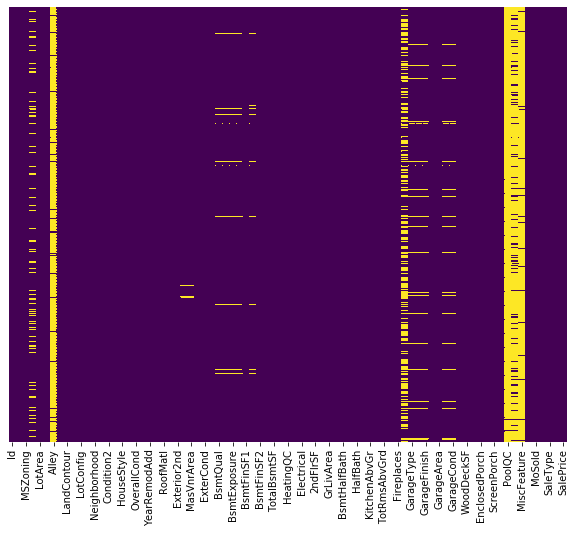

In [12]:
# finding there is present null value or notb
ax = plt.subplots(figsize=(10, 8))
sns.heatmap(train_data.isnull(),yticklabels=False, cbar=False, cmap = 'viridis')

In [13]:
# total null value present is 6965
train_data.isnull().sum().sum()

6965

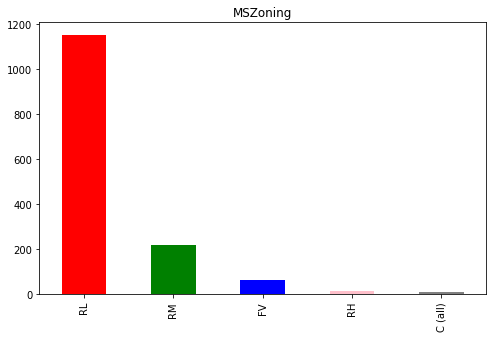

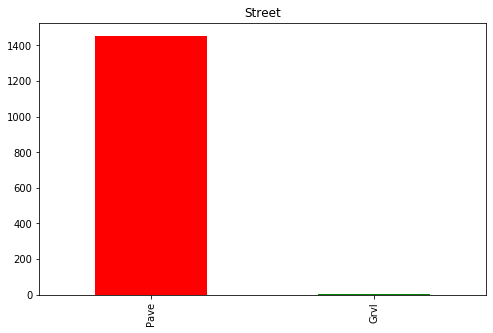

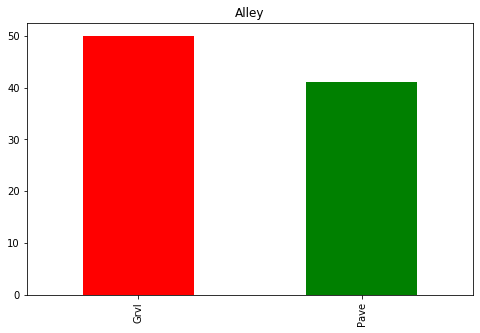

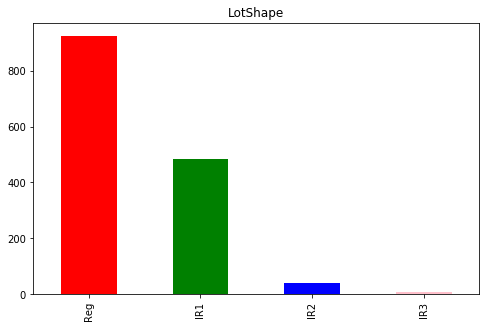

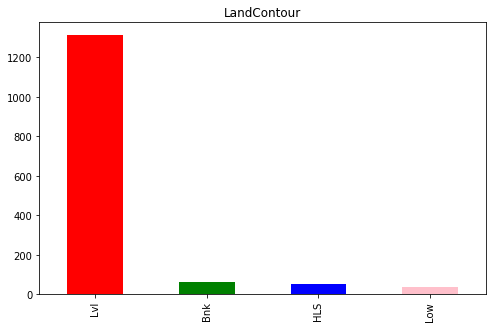

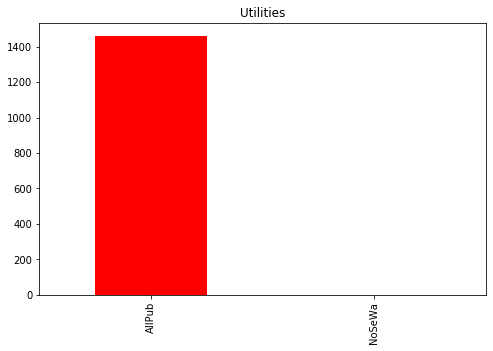

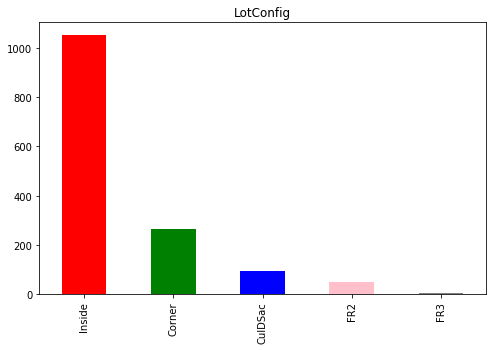

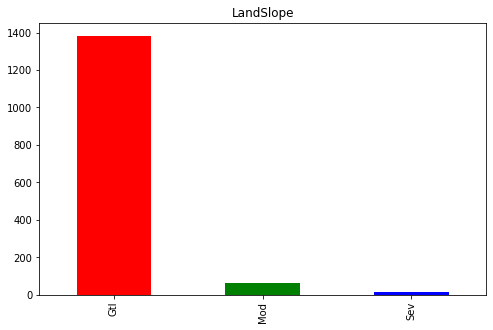

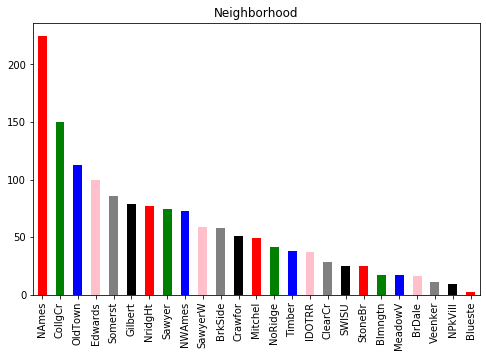

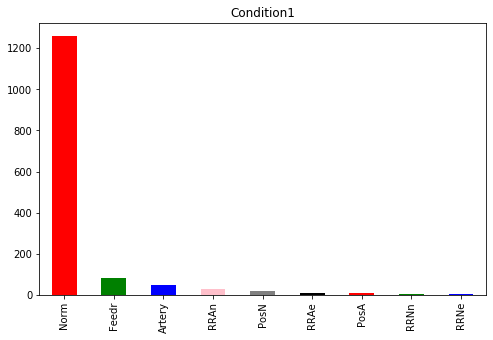

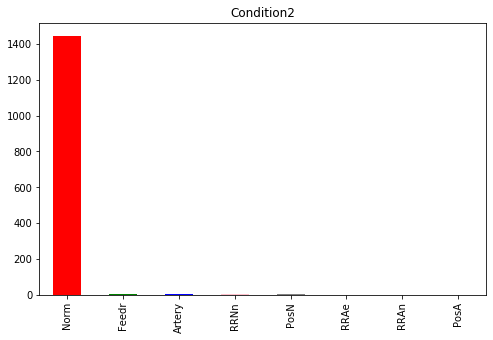

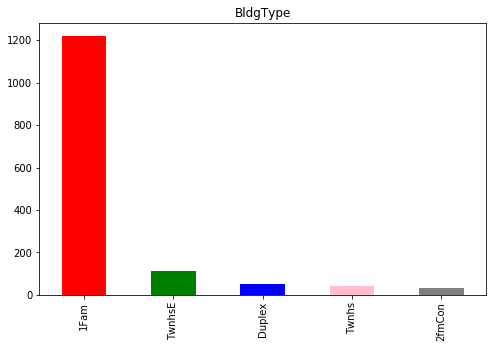

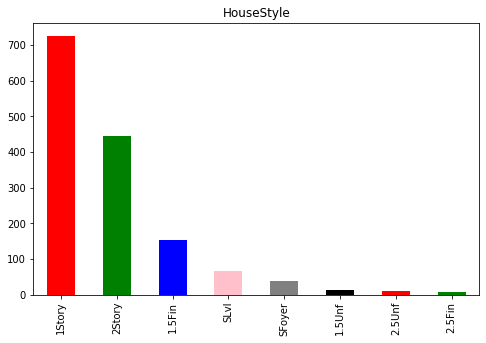

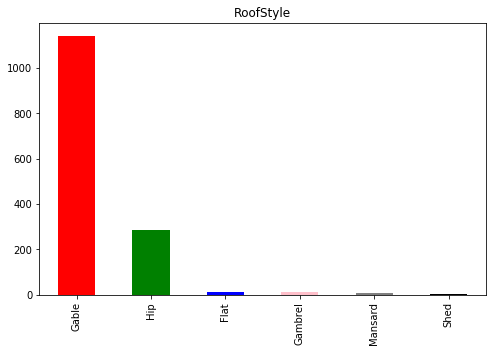

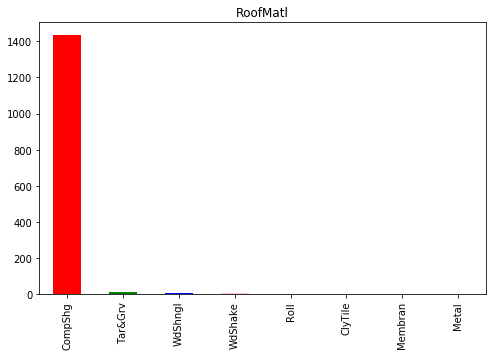

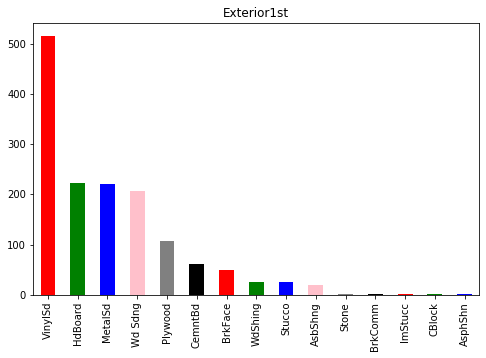

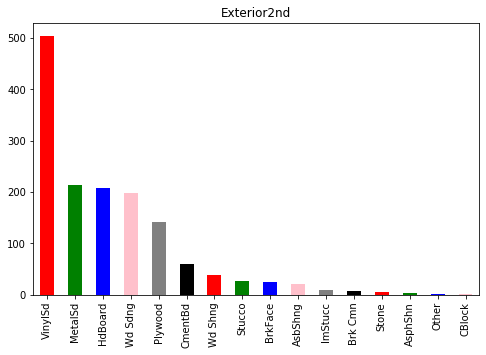

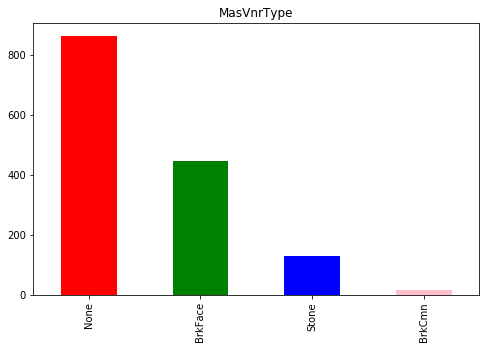

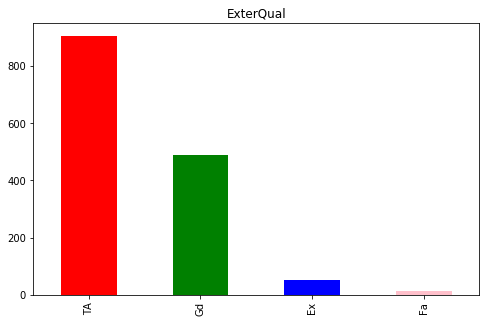

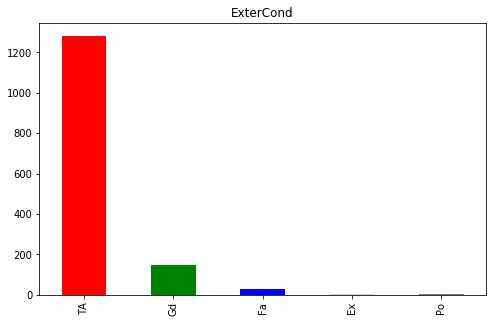

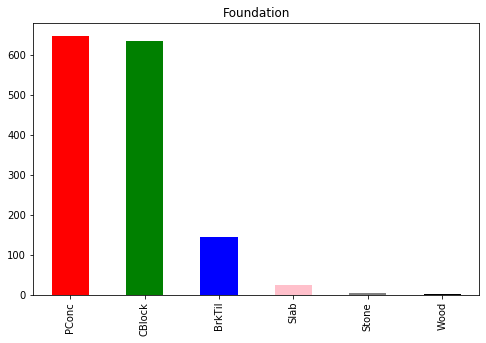

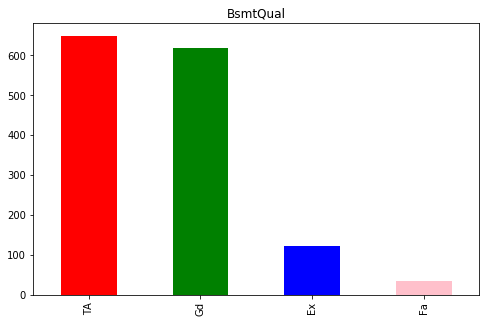

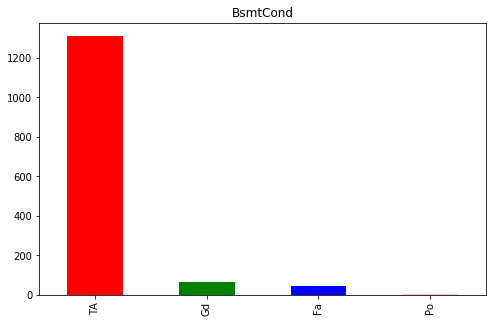

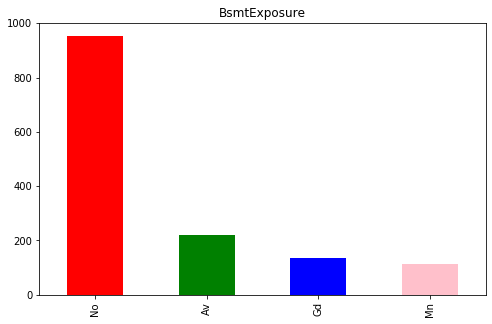

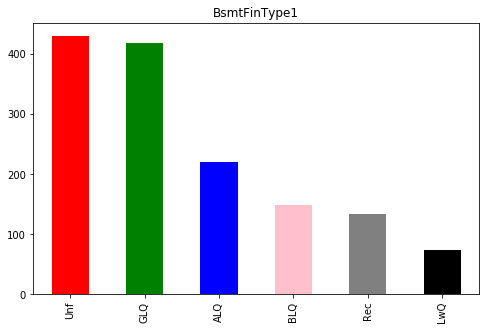

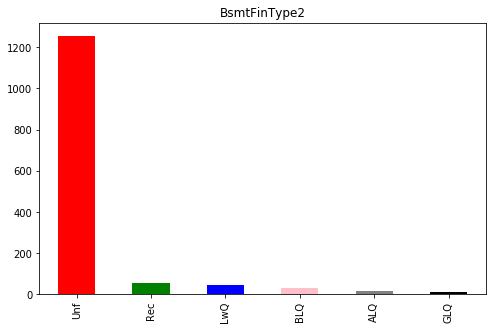

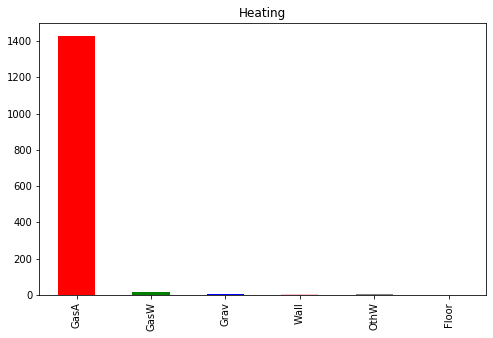

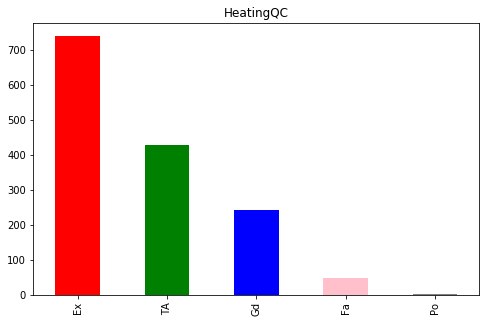

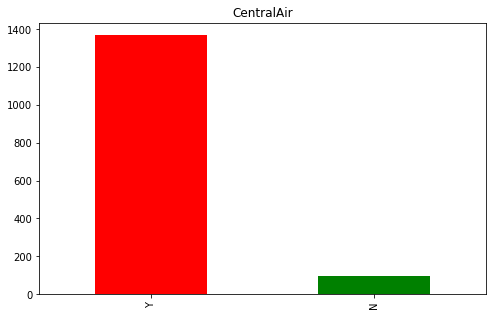

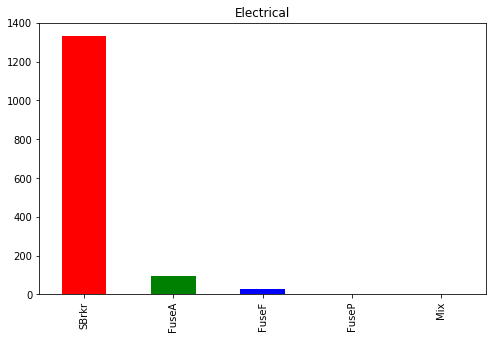

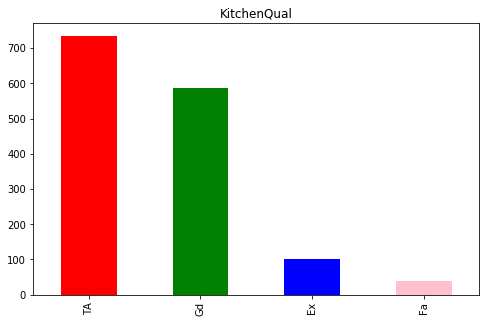

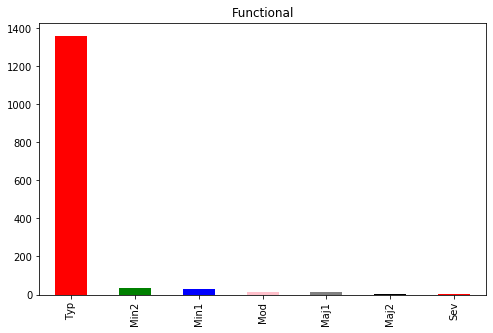

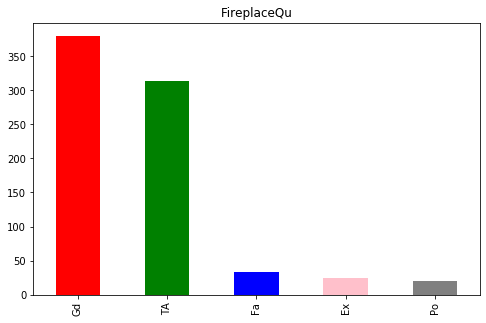

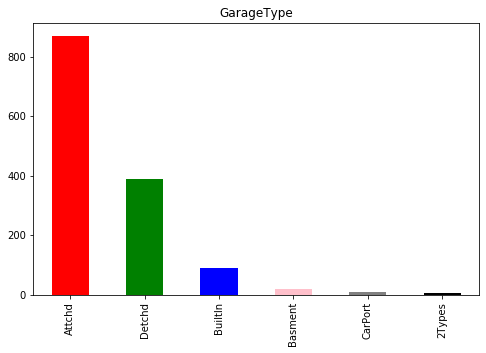

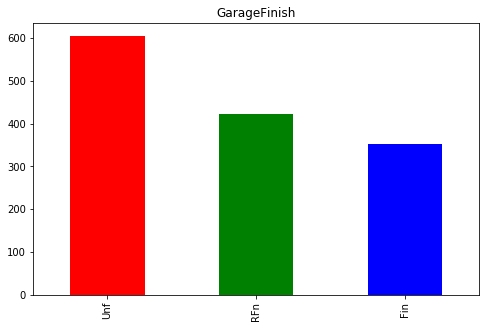

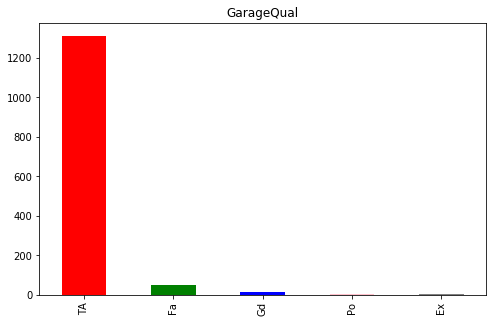

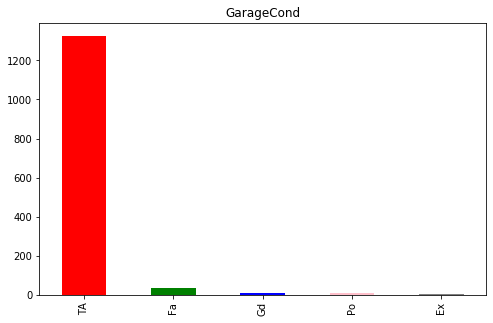

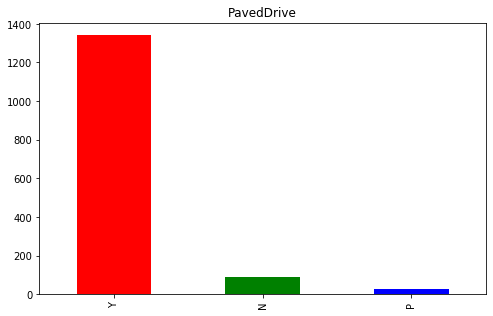

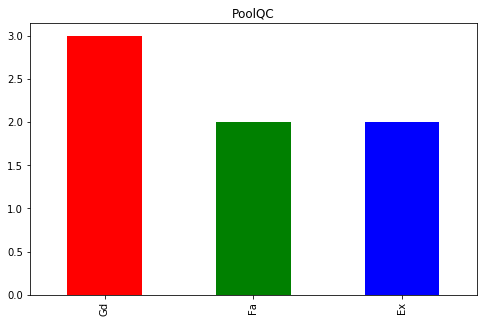

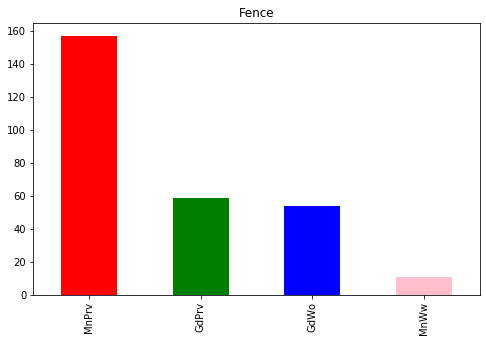

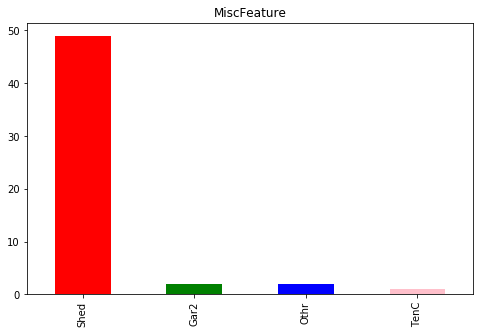

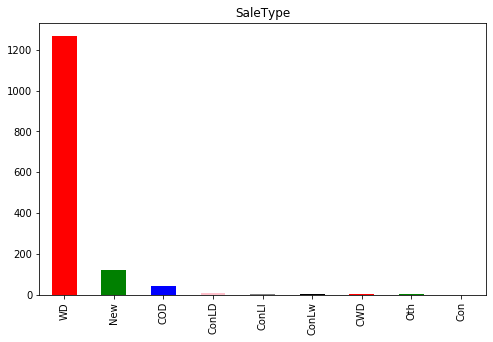

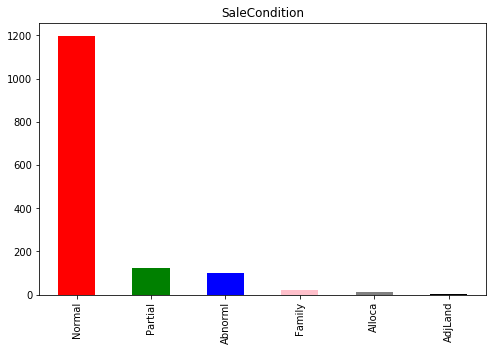

In [14]:
# visualizing Independent data quantity

lit = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition']
color = ['red', 'green', 'blue', 'pink', 'gray', 'black']
for k in lit:
    c = train_data[k].value_counts()
    c.plot(kind ='bar', color = color, figsize=(8,5))
    plt.title(k)
    plt.show()

In [15]:
train_data.columns[(train_data.dtypes == 'int64') | (train_data.dtypes == 'float64')]

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [16]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## data are normally distributed or not and checking outlayer

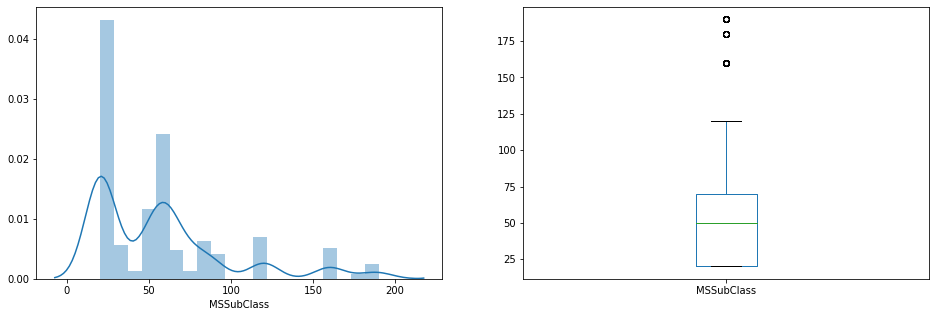

In [17]:
#Independent Variable (Numerical)

plt.subplot(121)
sns.distplot(train_data['MSSubClass'])
plt.subplot(122)
train_data['MSSubClass'].plot.box(figsize=(16, 5))

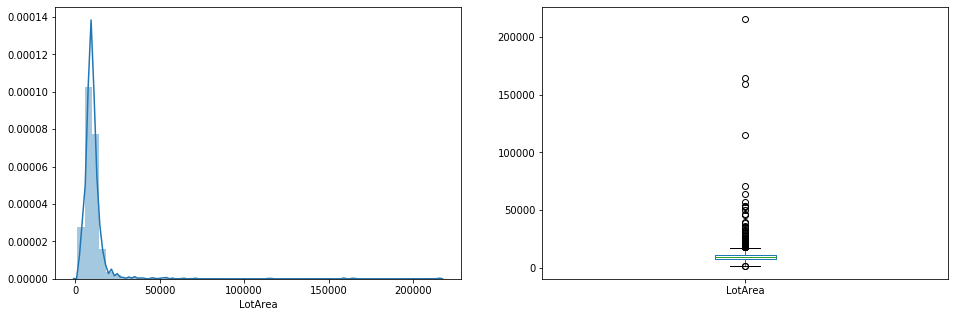

In [18]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train_data['LotArea'])
plt.subplot(122)
train_data['LotArea'].plot.box(figsize=(16, 5))

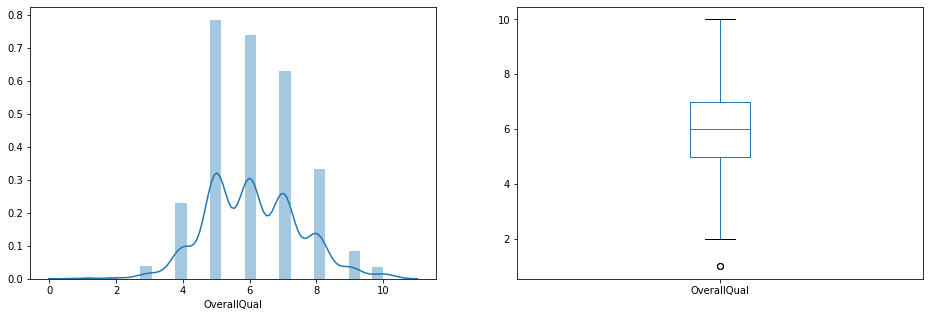

In [19]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train_data['OverallQual'])
plt.subplot(122)
train_data['OverallQual'].plot.box(figsize=(16, 5))

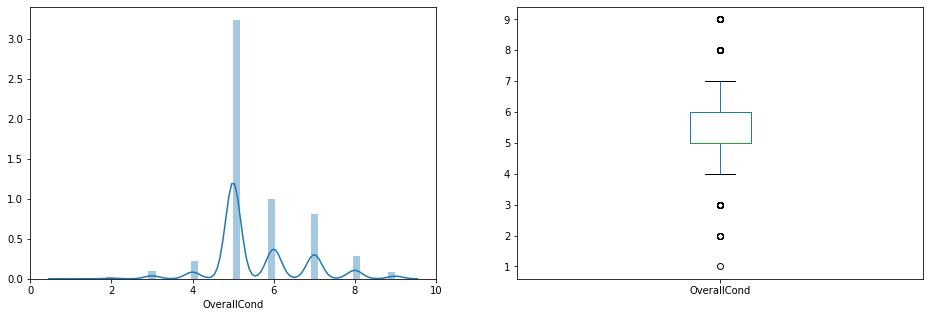

In [20]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train_data['OverallCond'])
plt.subplot(122)
train_data['OverallCond'].plot.box(figsize=(16, 5))

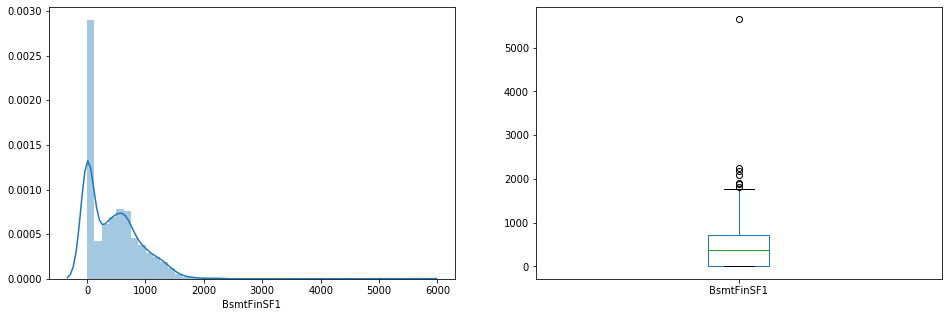

In [21]:

plt.figure(1)
plt.subplot(121)
sns.distplot(train_data['BsmtFinSF1'])
plt.subplot(122)
train_data['BsmtFinSF1'].plot.box(figsize=(16, 5))

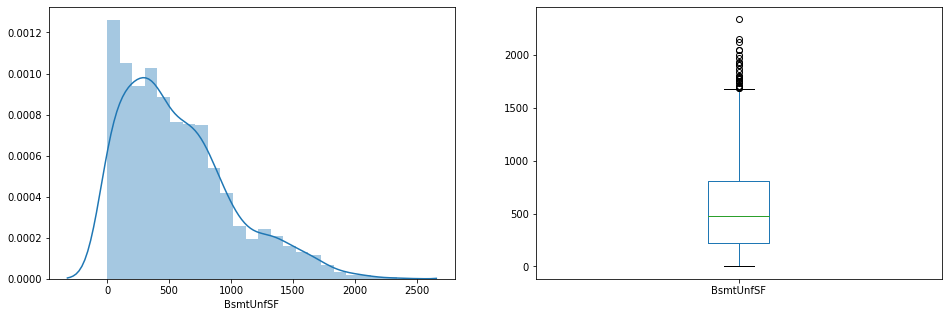

In [22]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train_data['BsmtUnfSF'])
plt.subplot(122)
train_data['BsmtUnfSF'].plot.box(figsize=(16, 5))

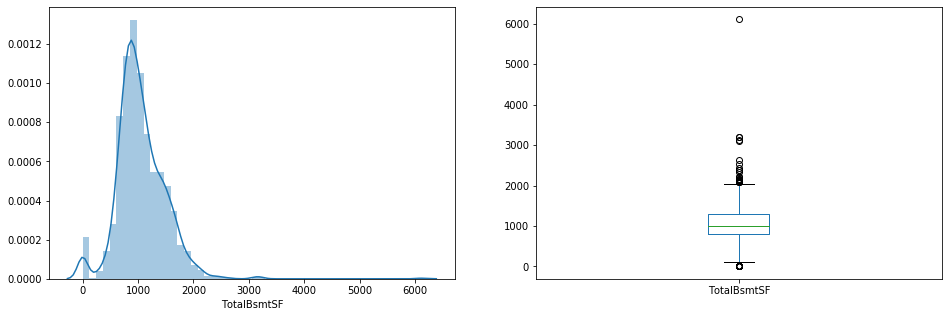

In [23]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train_data['TotalBsmtSF'])
plt.subplot(122)
train_data['TotalBsmtSF'].plot.box(figsize=(16, 5))

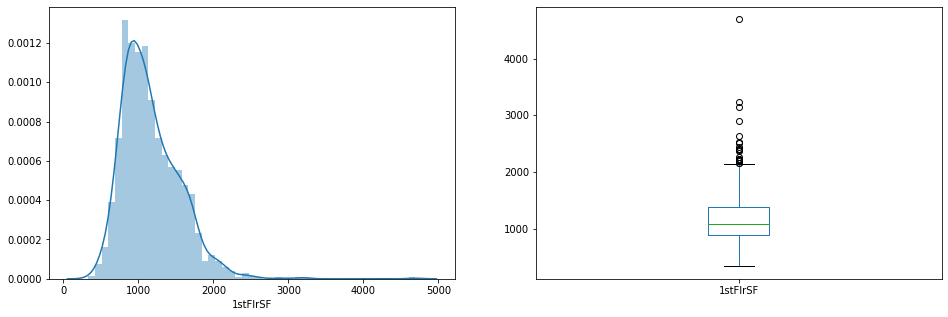

In [24]:

plt.figure(1)
plt.subplot(121)
sns.distplot(train_data['1stFlrSF'])
plt.subplot(122)
train_data['1stFlrSF'].plot.box(figsize=(16, 5))

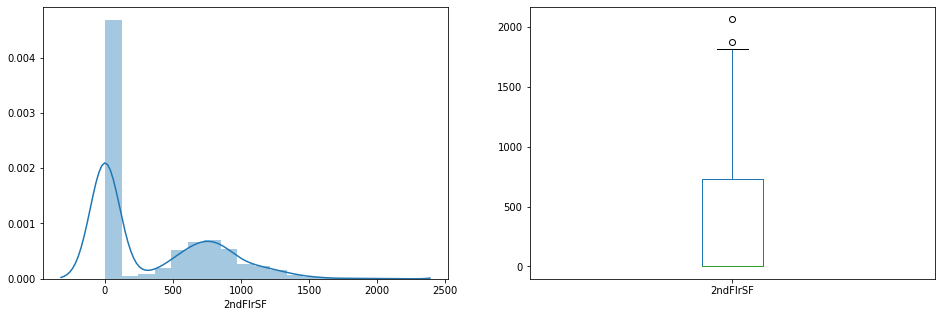

In [25]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train_data['2ndFlrSF'])
plt.subplot(122)
train_data['2ndFlrSF'].plot.box(figsize=(16, 5))

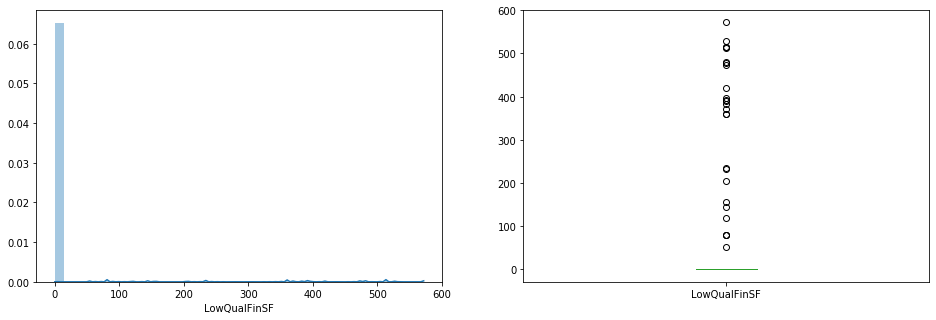

In [26]:

plt.figure(1)
plt.subplot(121)
sns.distplot(train_data['LowQualFinSF'])
plt.subplot(122)
train_data['LowQualFinSF'].plot.box(figsize=(16, 5))

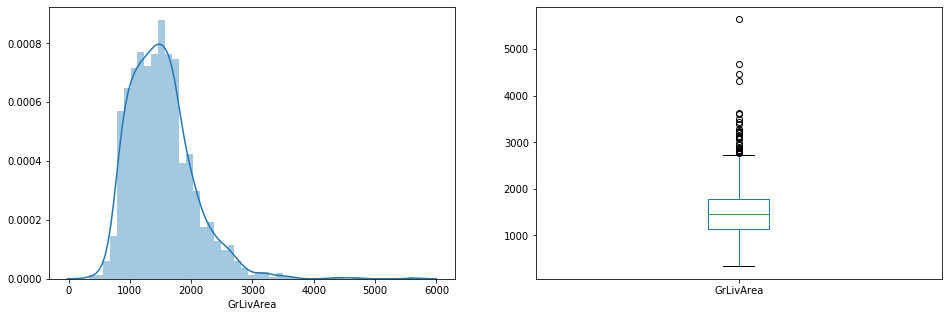

In [27]:

plt.figure(1)
plt.subplot(121)
sns.distplot(train_data['GrLivArea'])
plt.subplot(122)
train_data['GrLivArea'].plot.box(figsize=(16, 5))

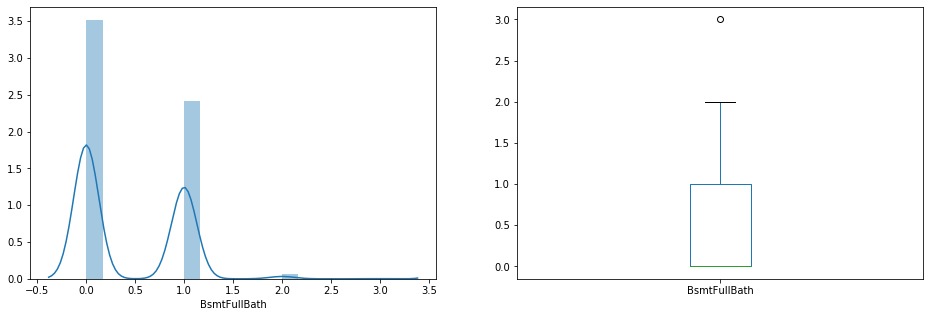

In [28]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train_data['BsmtFullBath'])
plt.subplot(122)
train_data['BsmtFullBath'].plot.box(figsize=(16, 5))

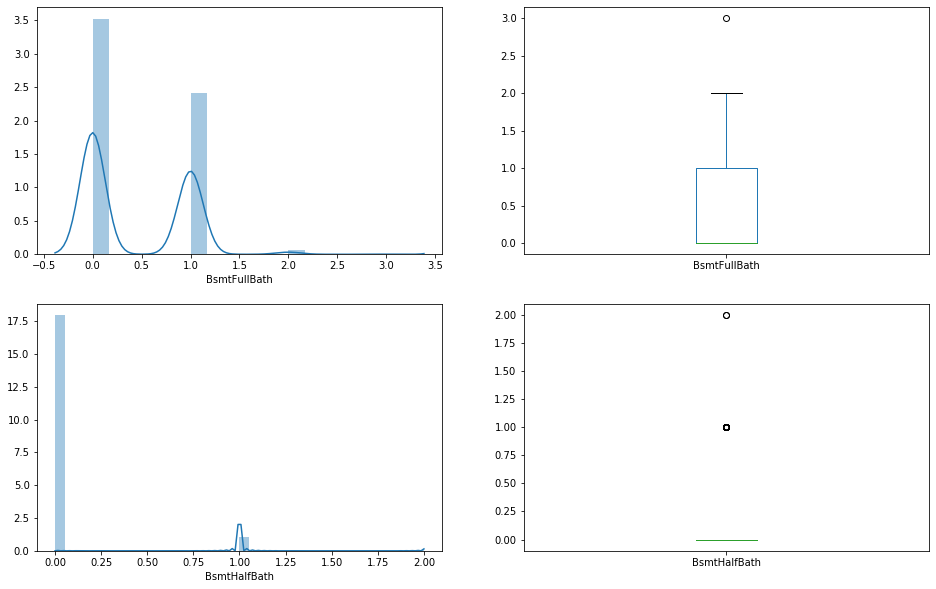

In [29]:
plt.figure(1)
plt.subplot(221)
sns.distplot(train_data['BsmtFullBath'])
plt.subplot(222)
train_data['BsmtFullBath'].plot.box(figsize=(16, 10))
plt.subplot(223)
sns.distplot(train_data['BsmtHalfBath'])
plt.subplot(224)
train_data['BsmtHalfBath'].plot.box(figsize=(16, 10))
plt.show()
plt.close()

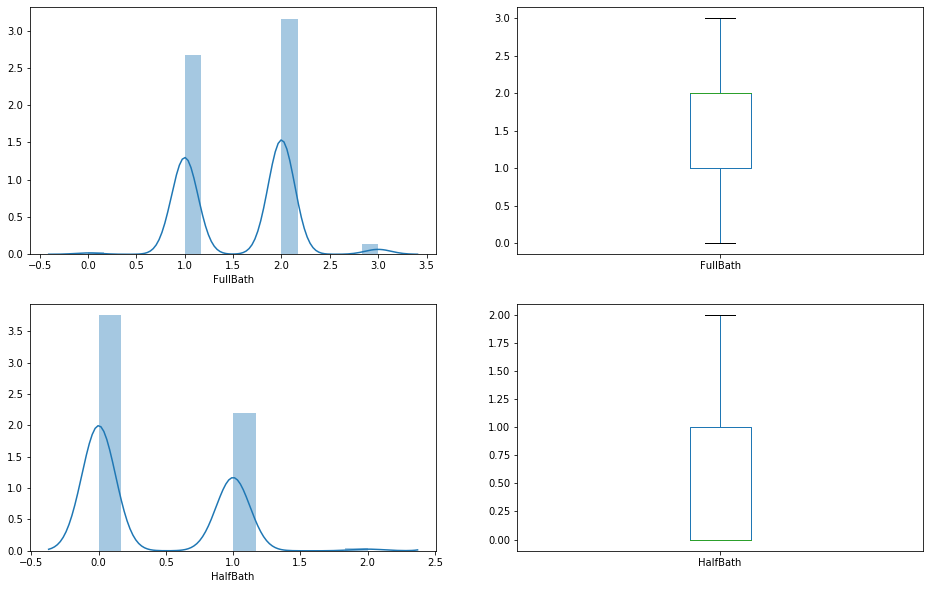

In [30]:
plt.figure(1)
plt.subplot(221)
sns.distplot(train_data['FullBath'])
plt.subplot(222)
train_data['FullBath'].plot.box(figsize=(16, 10))
plt.subplot(223)
sns.distplot(train_data['HalfBath'])
plt.subplot(224)
train_data['HalfBath'].plot.box(figsize=(16, 10))
plt.show()
plt.close()

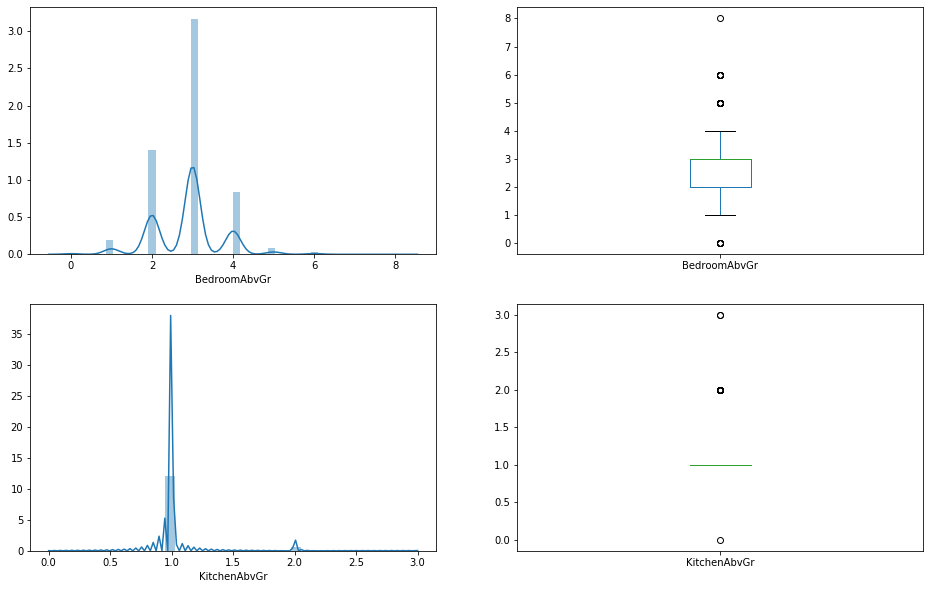

In [31]:
plt.figure(1)
plt.subplot(221)
sns.distplot(train_data['BedroomAbvGr'])
plt.subplot(222)
train_data['BedroomAbvGr'].plot.box(figsize=(16, 10))
plt.subplot(223)
sns.distplot(train_data['KitchenAbvGr'])
plt.subplot(224)
train_data['KitchenAbvGr'].plot.box(figsize=(16, 10))
plt.show()
plt.close()

In [32]:
new_train1 = train_data.dropna(axis=1)

In [33]:
pd.pivot_table(new_train1, index='HouseStyle', values='SalePrice',aggfunc='mean')

,SalePrice
HouseStyle,
1.5Fin,143116.740260
1.5Unf,110150.000000
1Story,175985.477961
2.5Fin,220000.000000
2.5Unf,157354.545455
2Story,210051.764045
SFoyer,135074.486486
SLvl,166703.384615


In [34]:
#new_train1.columns
# checking with all attribute with saleprice
lit2 = ['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition']

## comparing all attribute with Sale price

In [35]:
li = []
for i in list(train_data.columns[train_data.dtypes == 'object']):
    li.append(i)

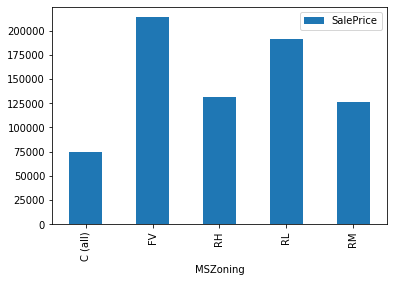

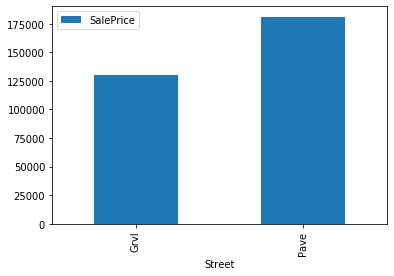

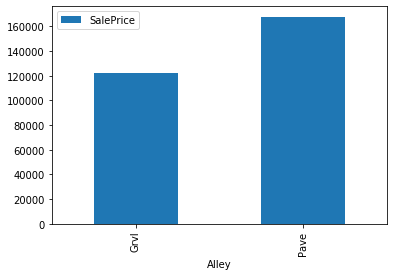

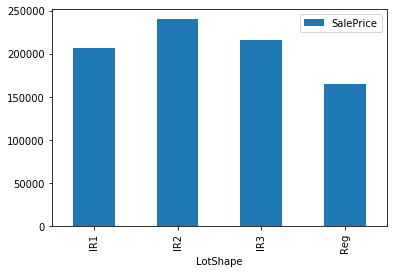

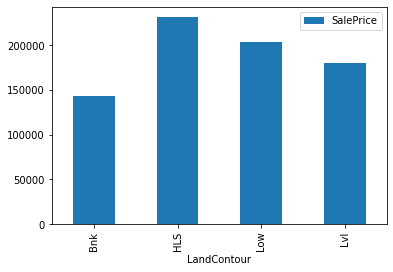

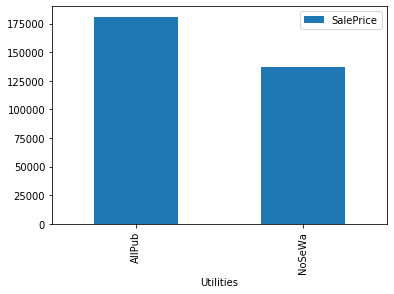

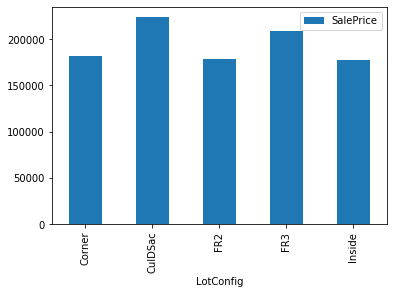

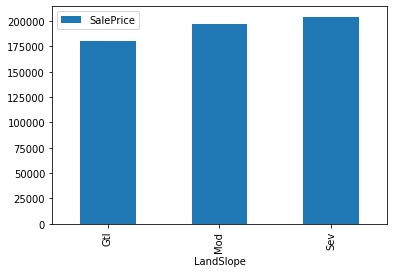

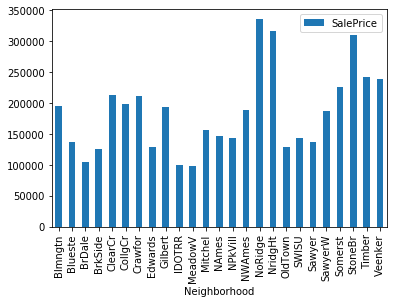

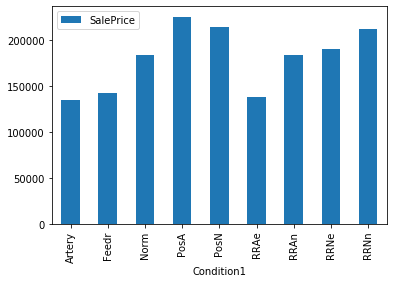

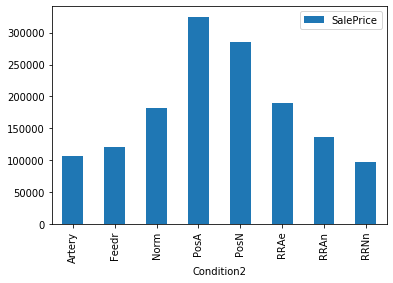

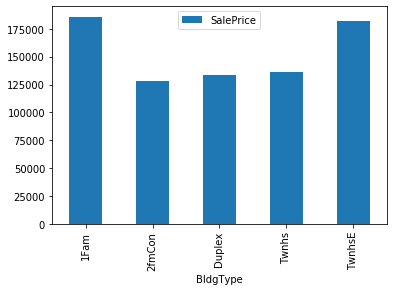

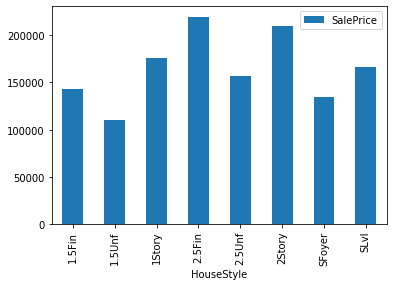

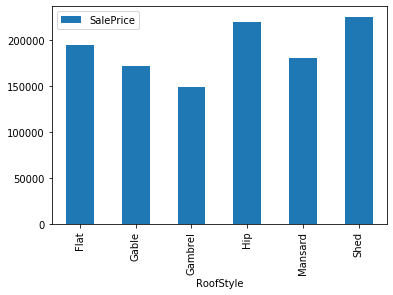

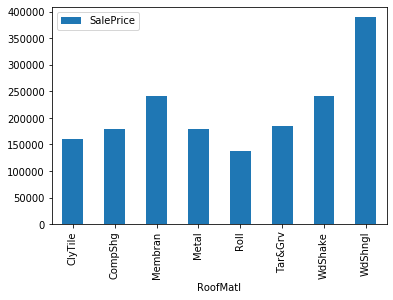

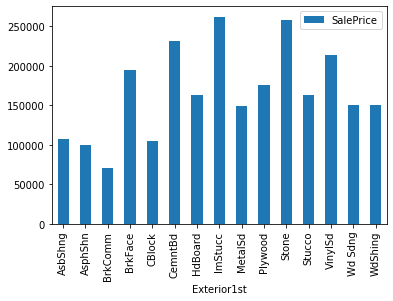

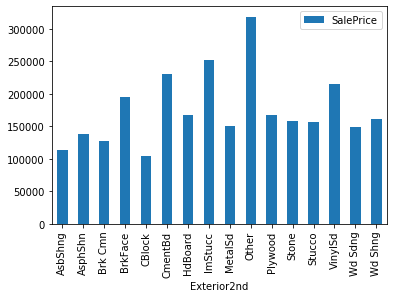

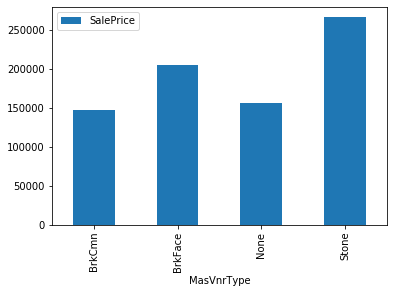

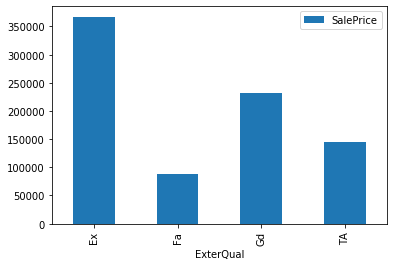

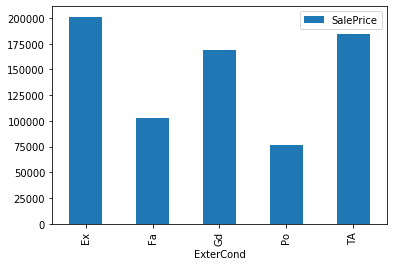

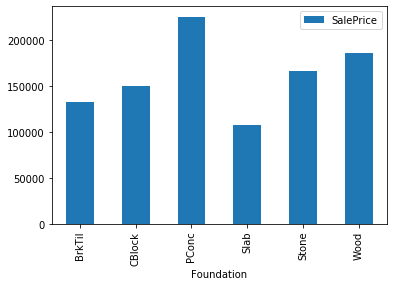

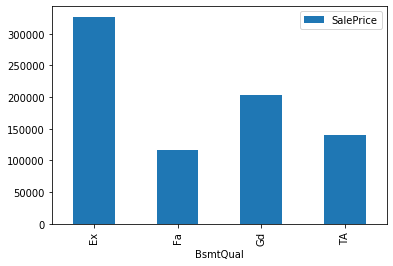

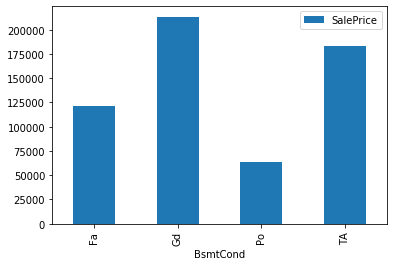

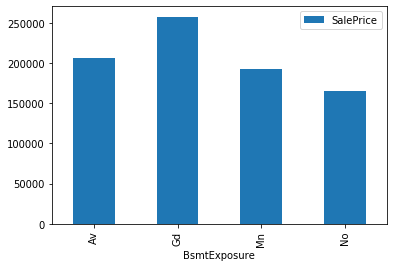

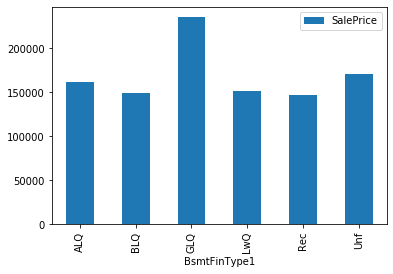

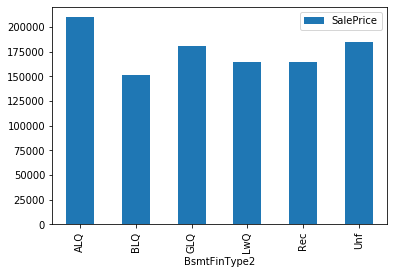

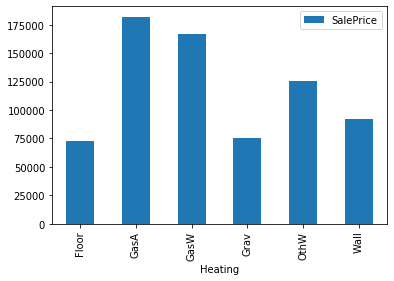

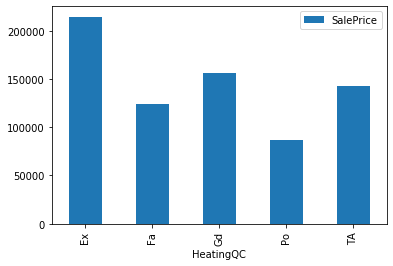

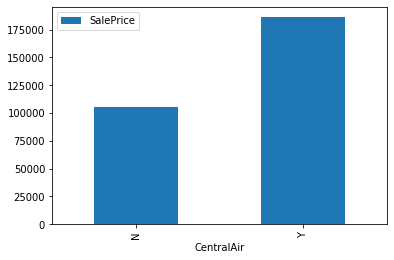

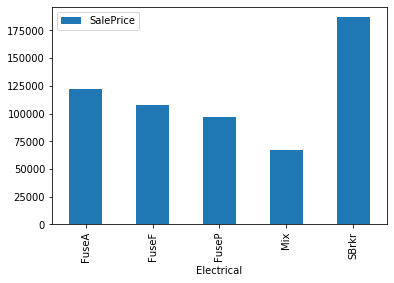

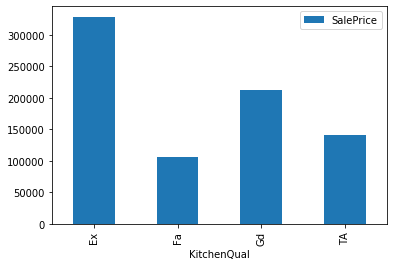

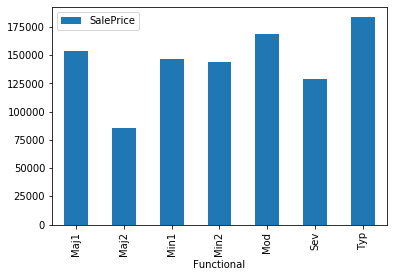

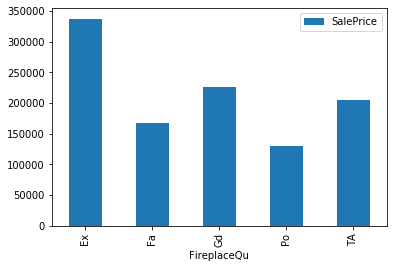

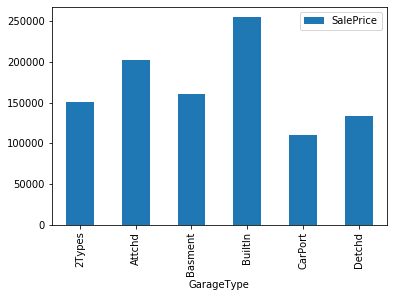

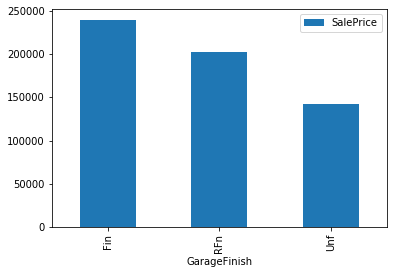

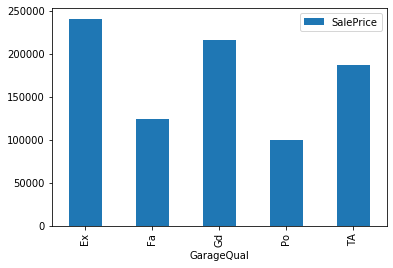

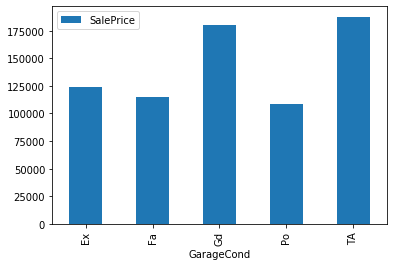

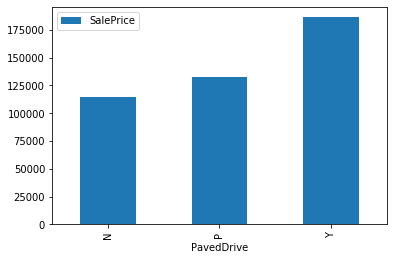

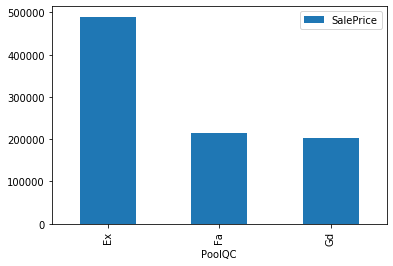

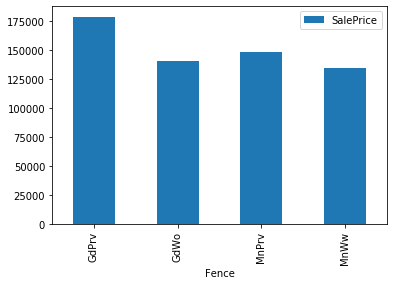

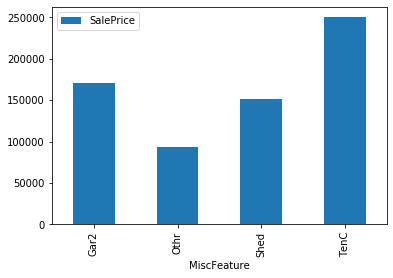

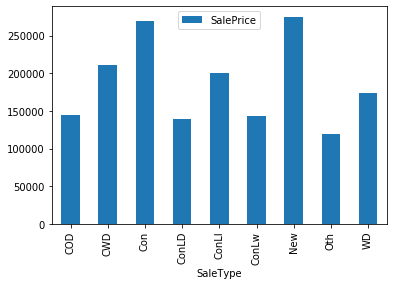

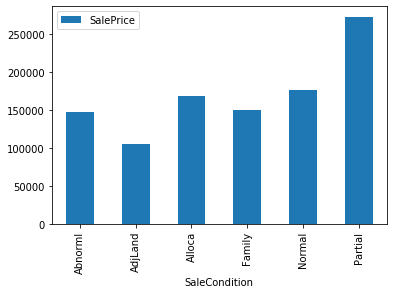

In [36]:
# qualitative data with saleprice
for i in li:
    mi = pd.pivot_table(train_data, index = i, values='SalePrice')
    mi.plot(kind='bar')
    plt.show()

# hypothesis

overallqua : if there is overallqua is high then it more chances to get high sale price 

GrLivAea : There is more probability to get high sale price

Garage Cars, Garage Area : if there is large garage size then more chance to get high sale price

TotalBsmtSf, 1stGirSF, Full Bath, TotRmsAbvGrd, Fireplaces, GarageYrBit are also affecting sales price

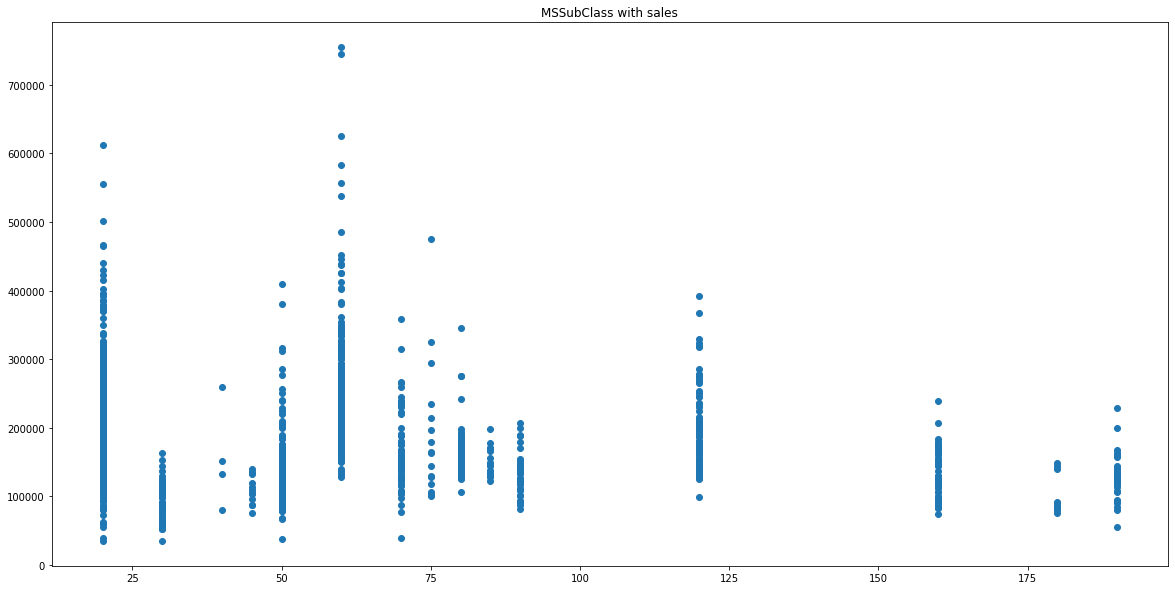

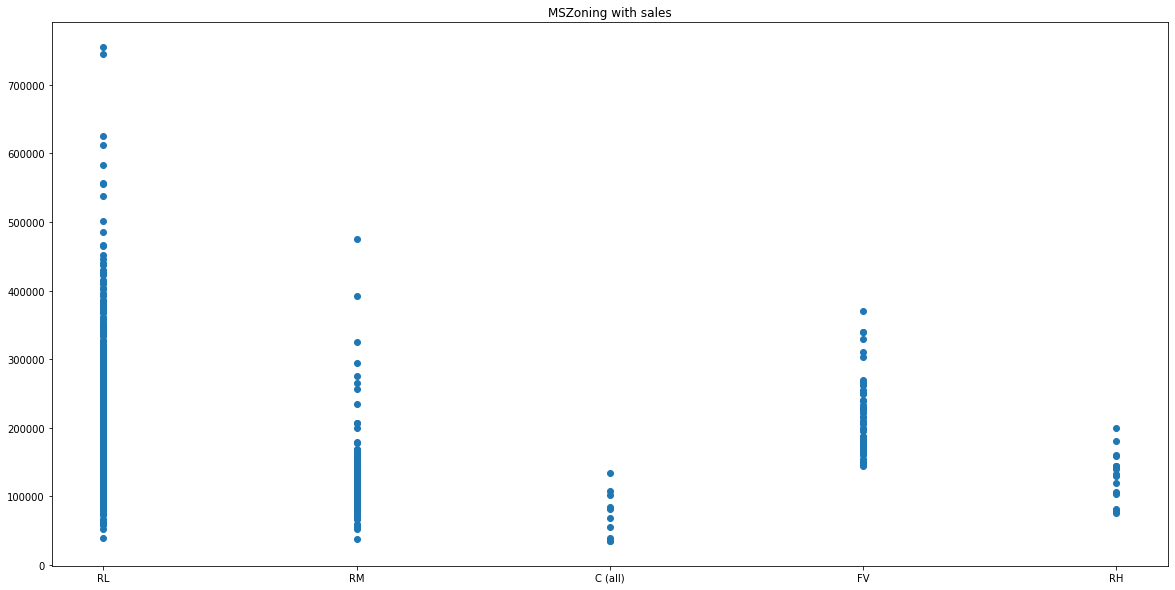

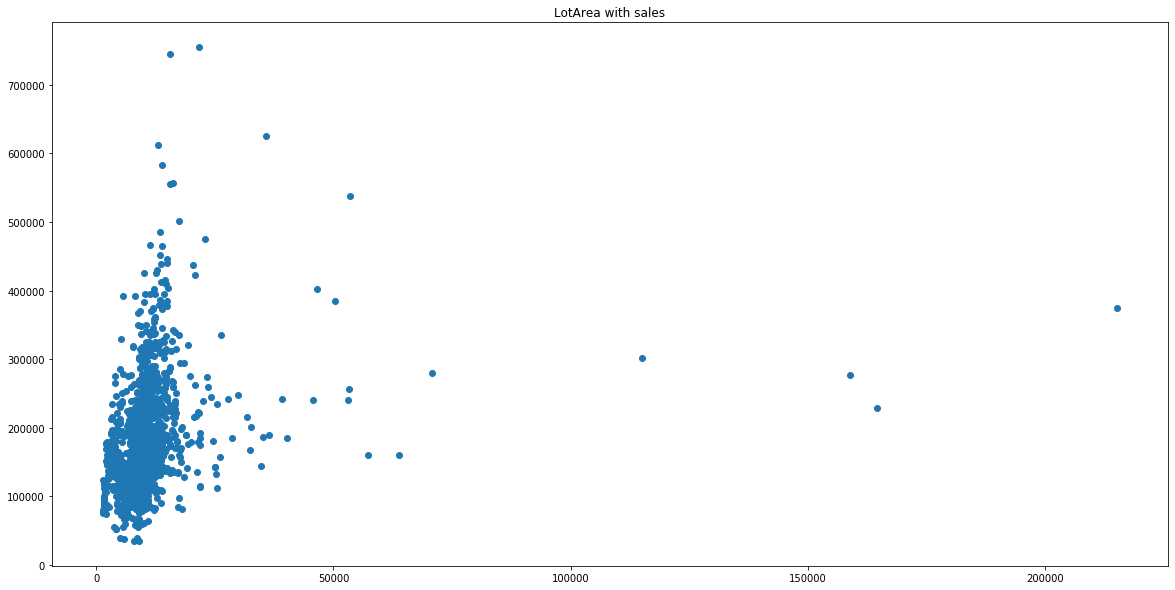

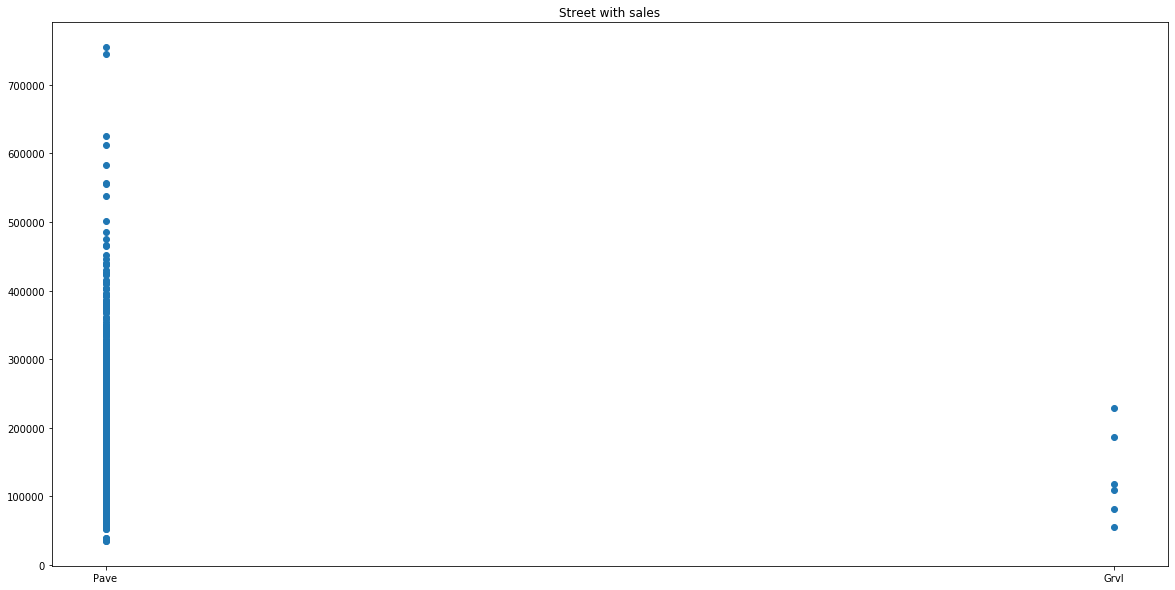

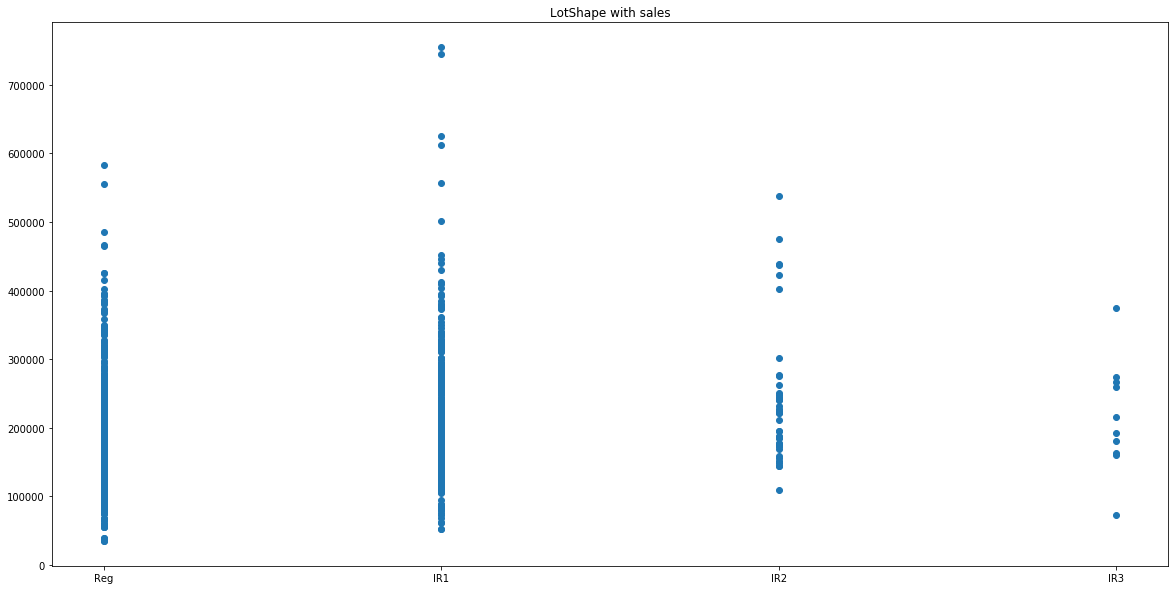

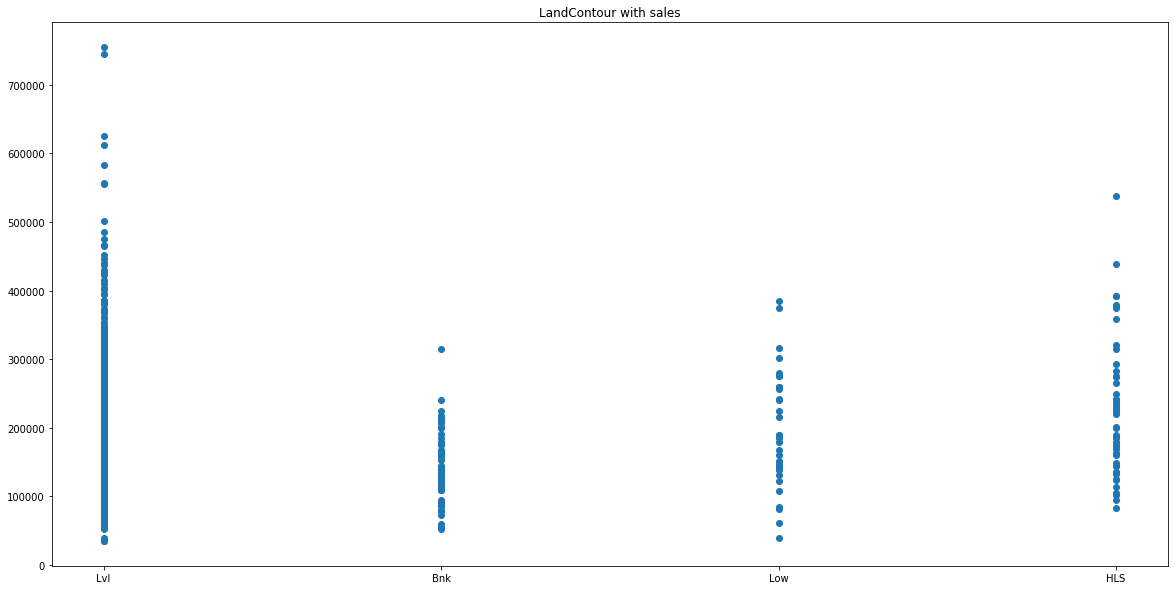

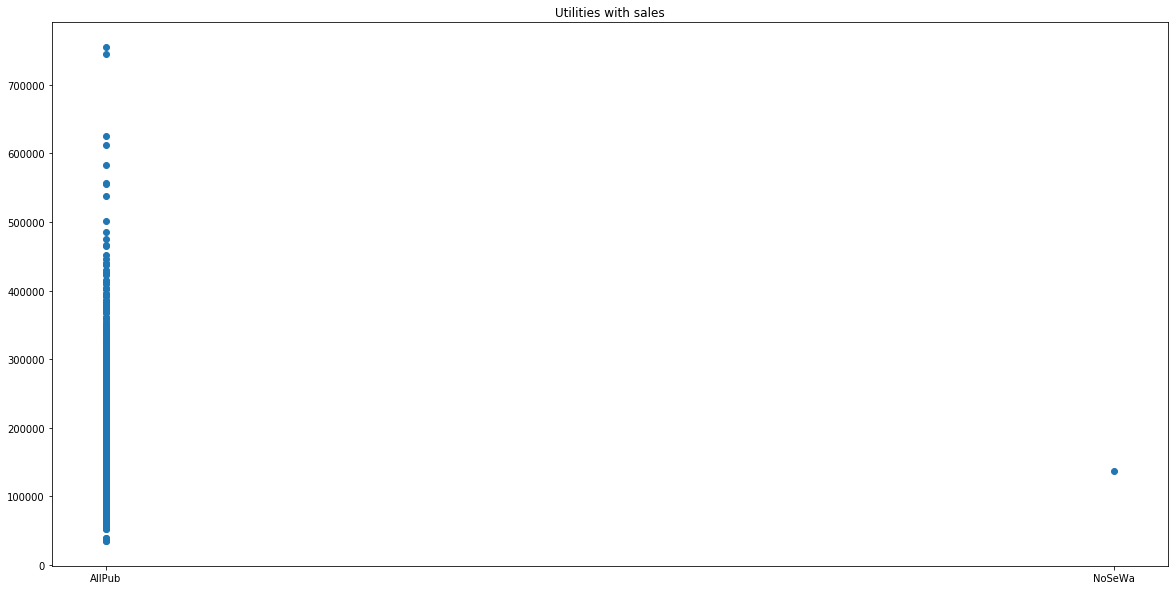

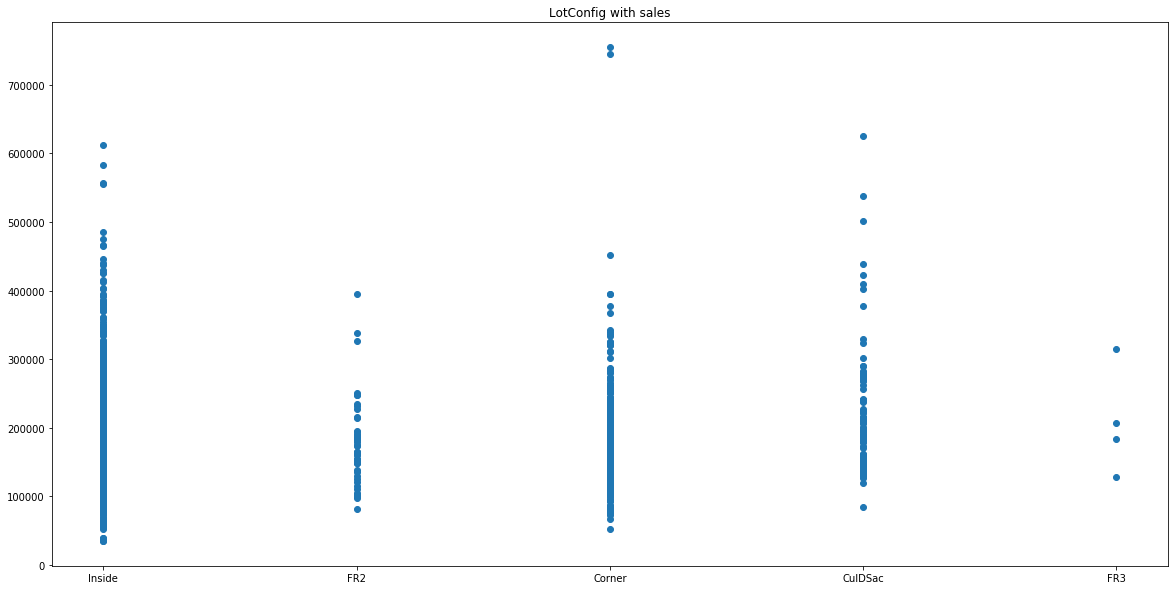

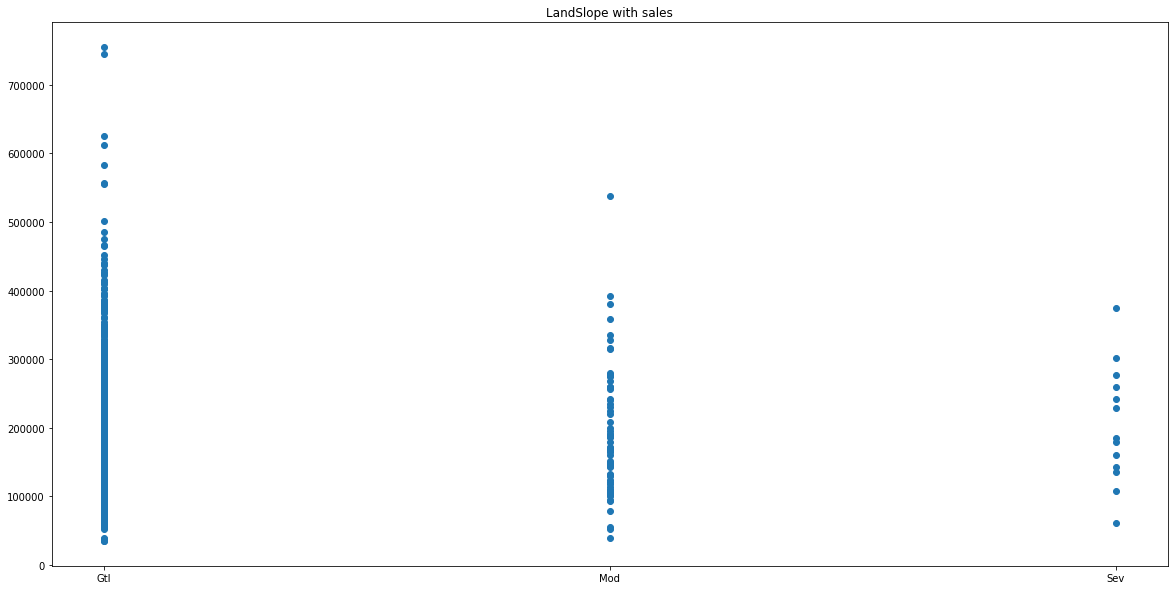

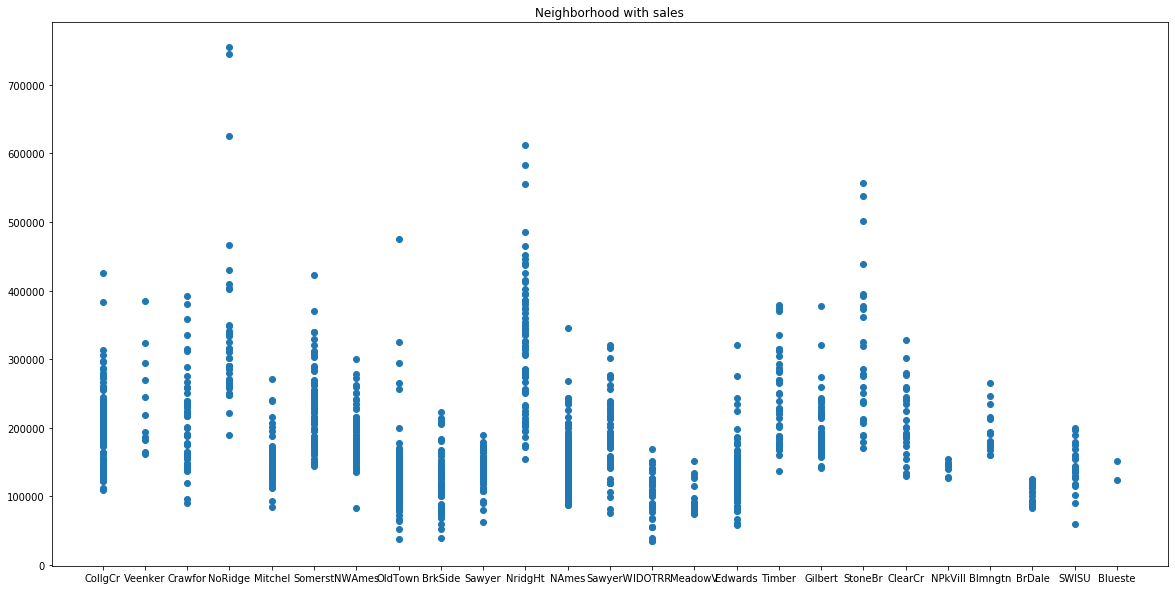

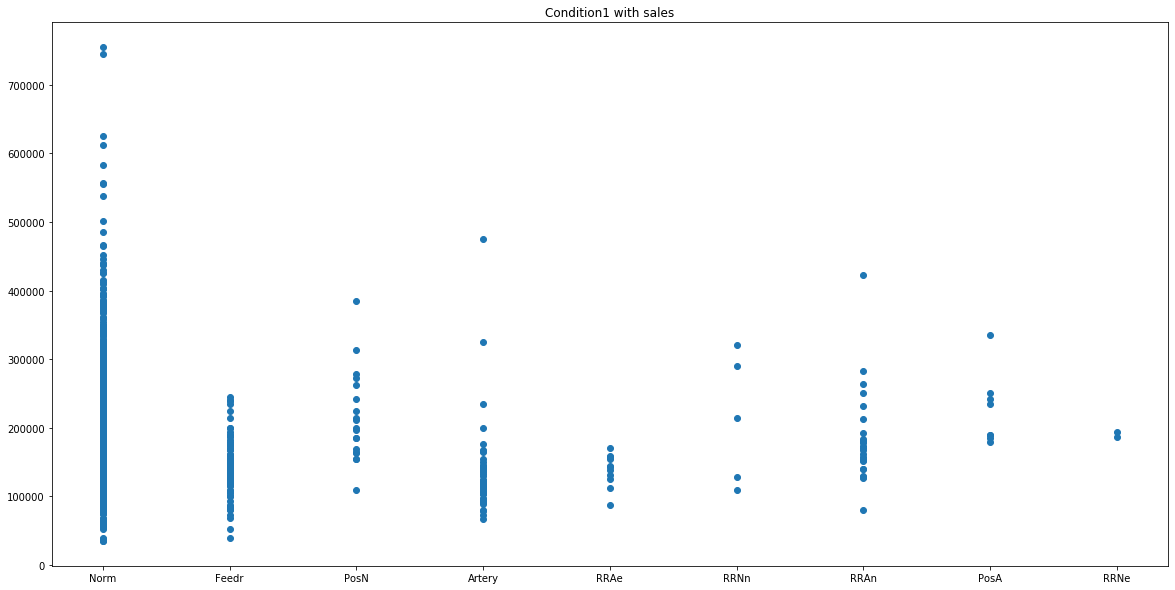

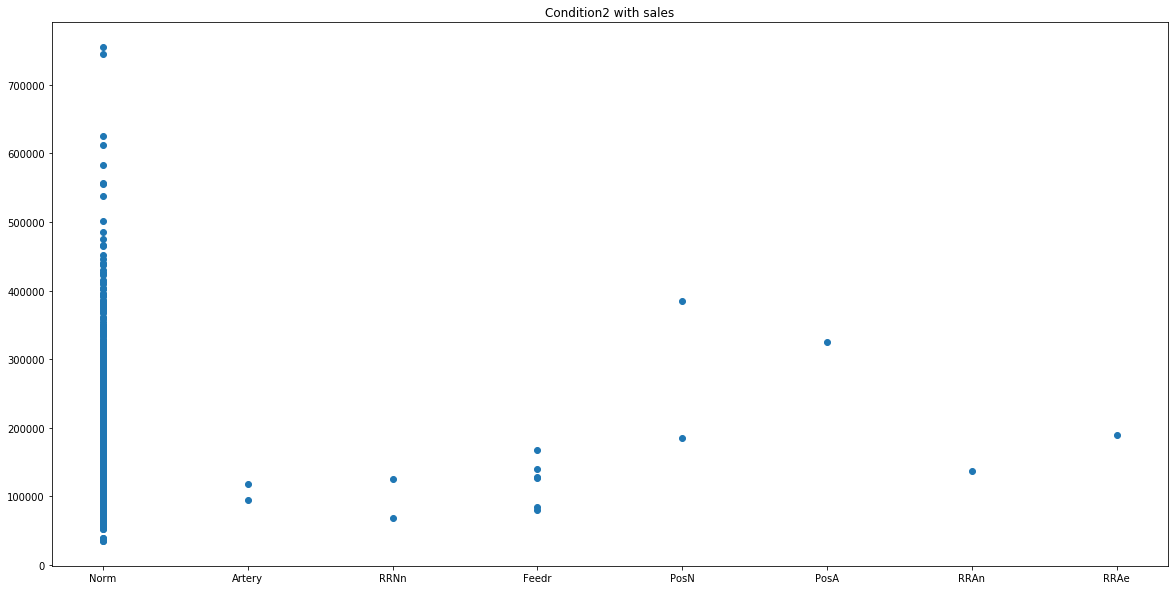

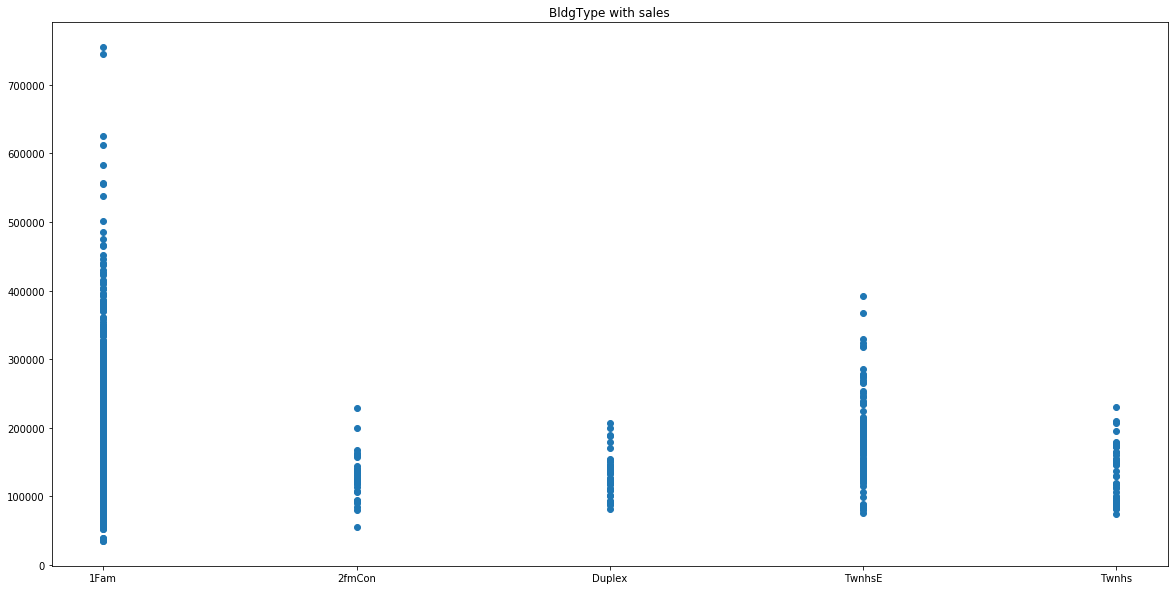

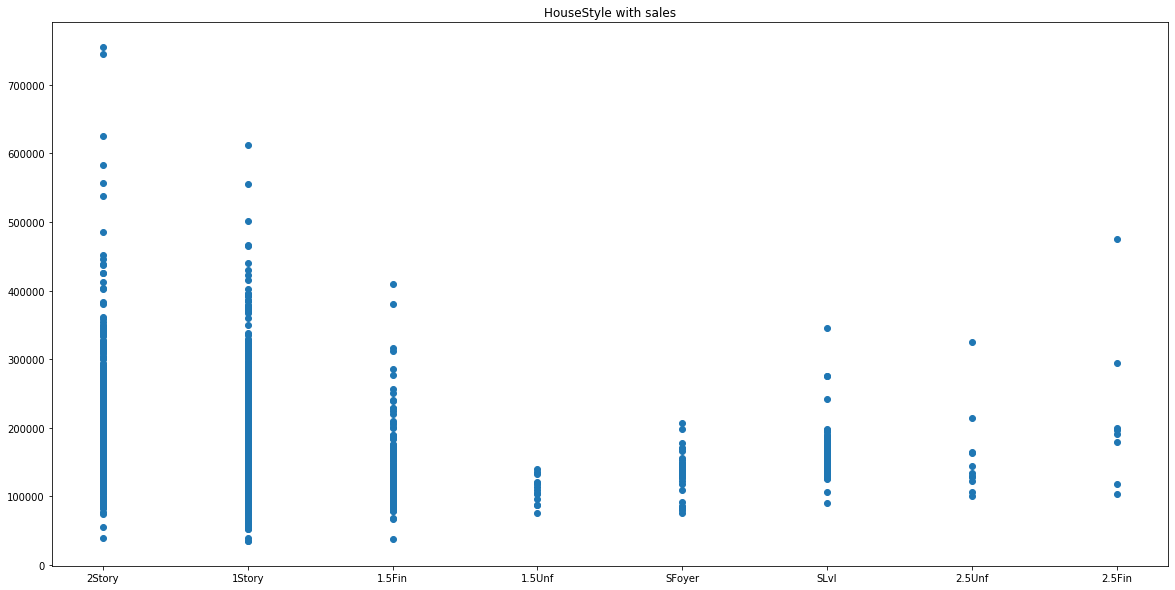

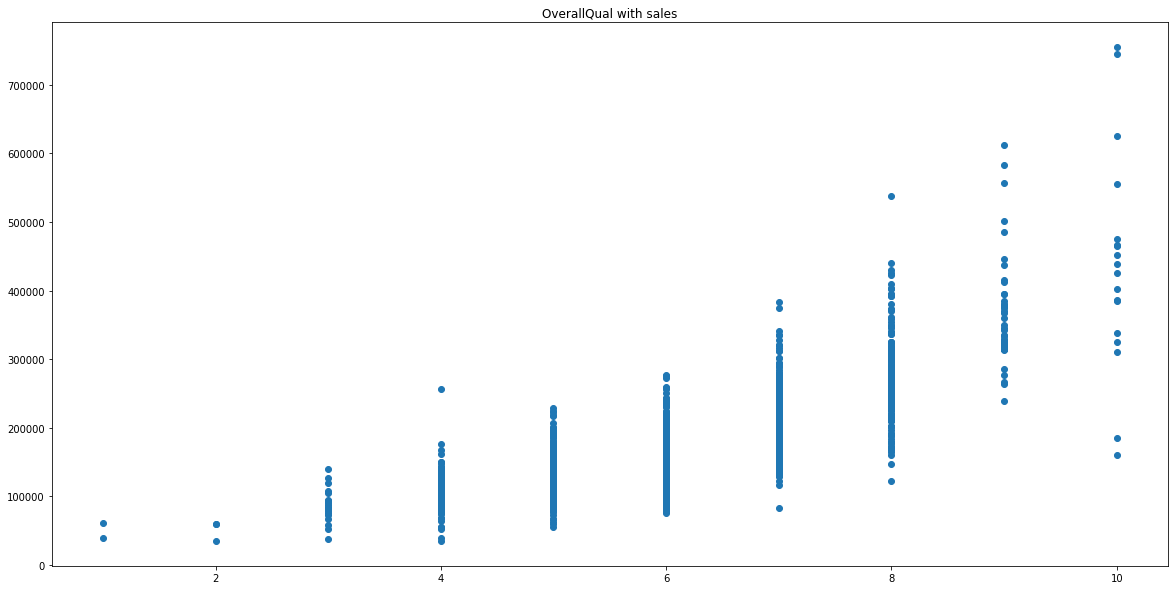

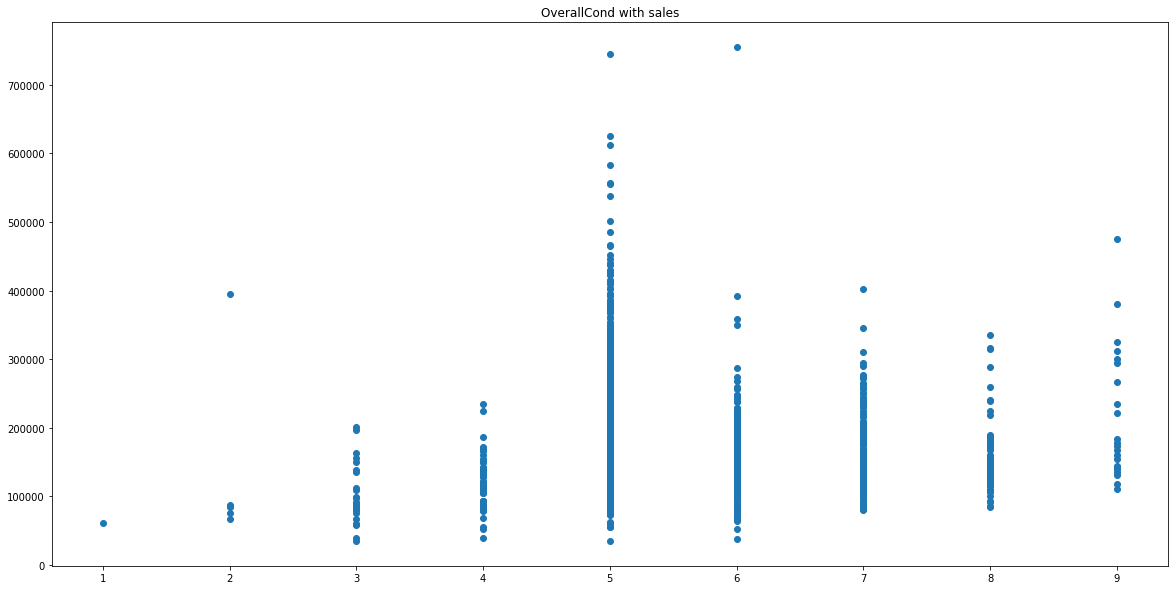

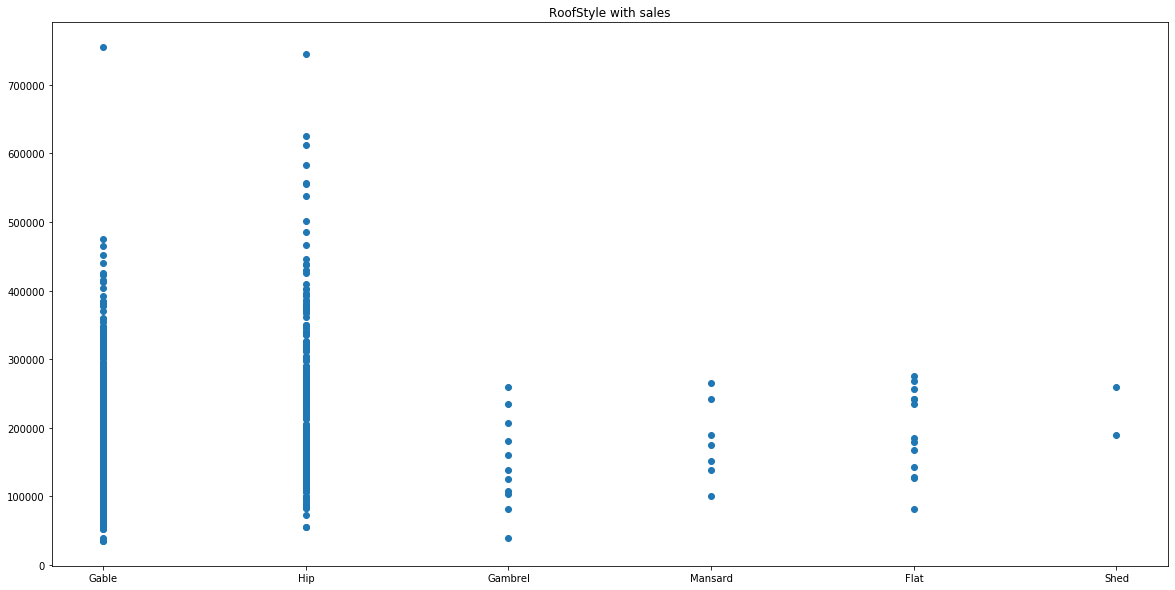

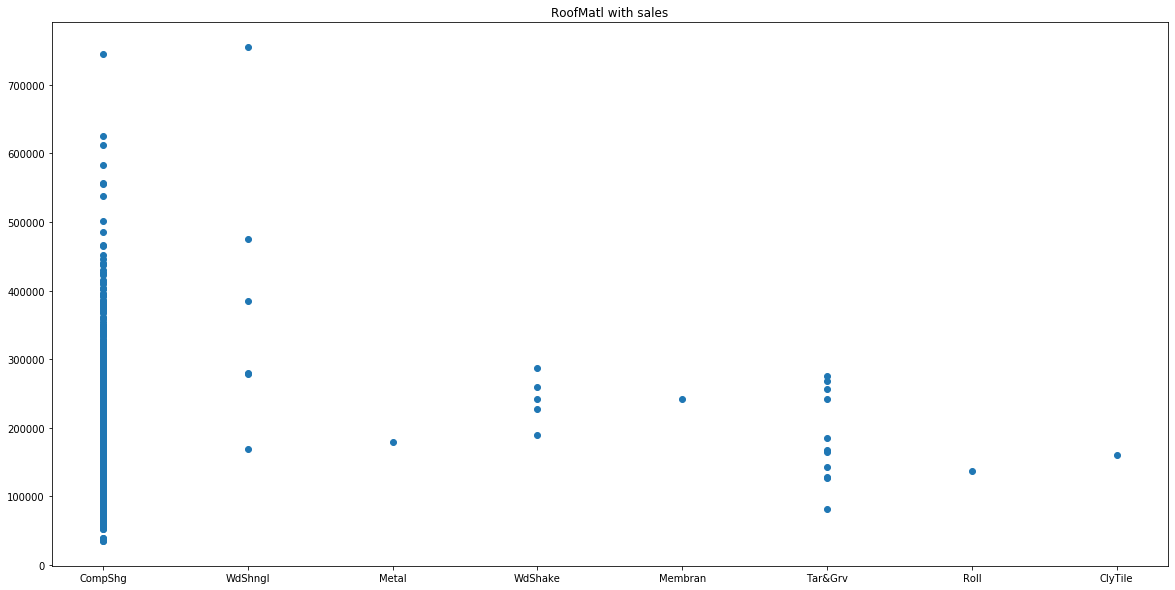

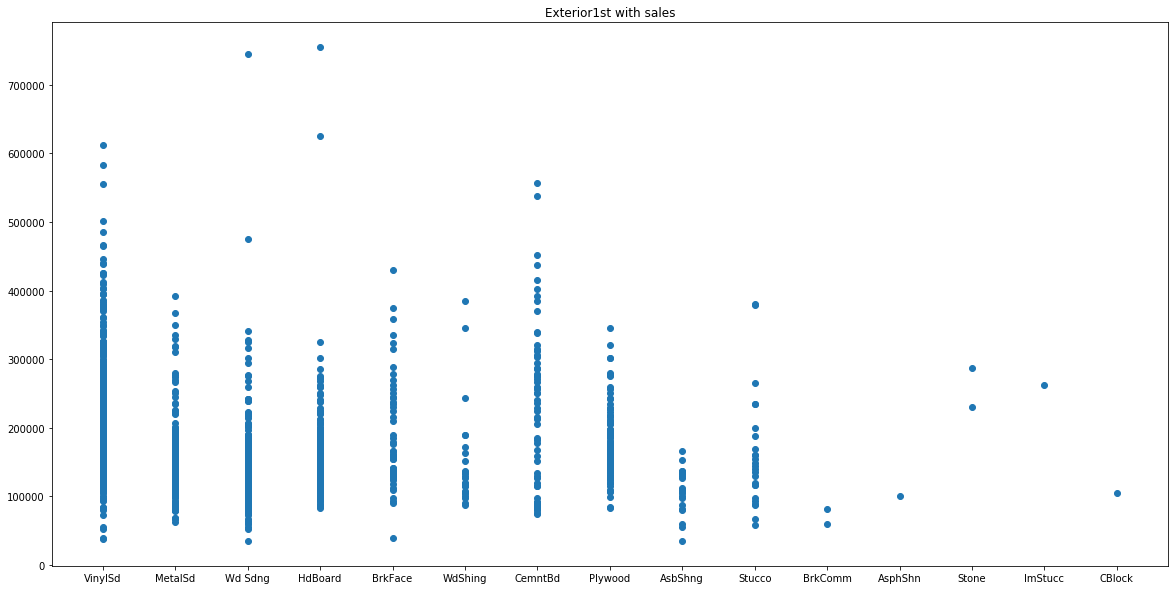

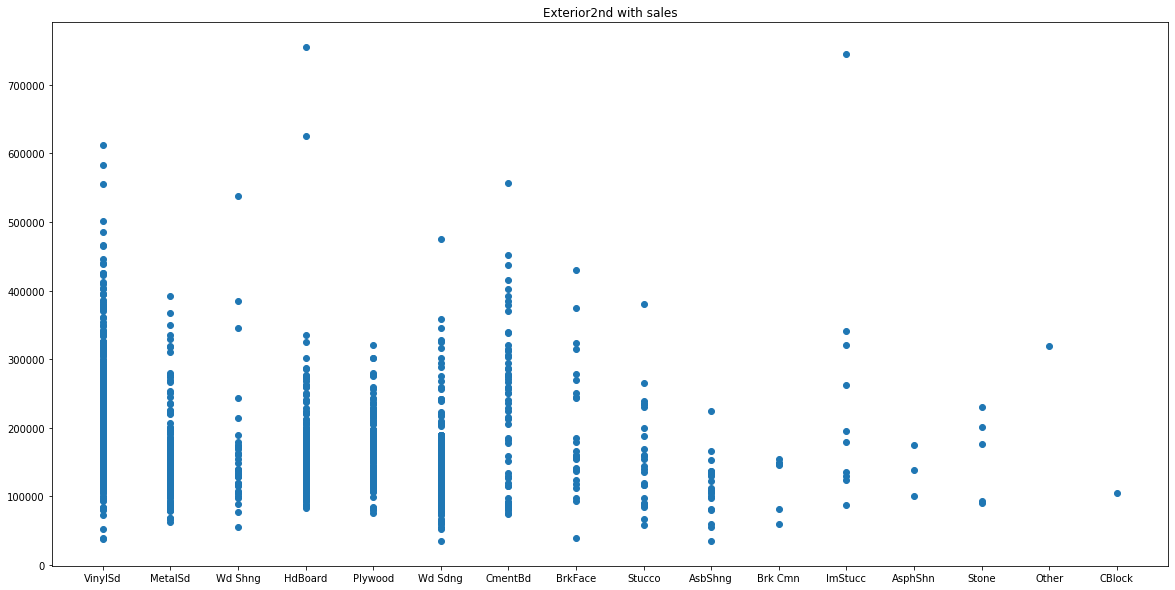

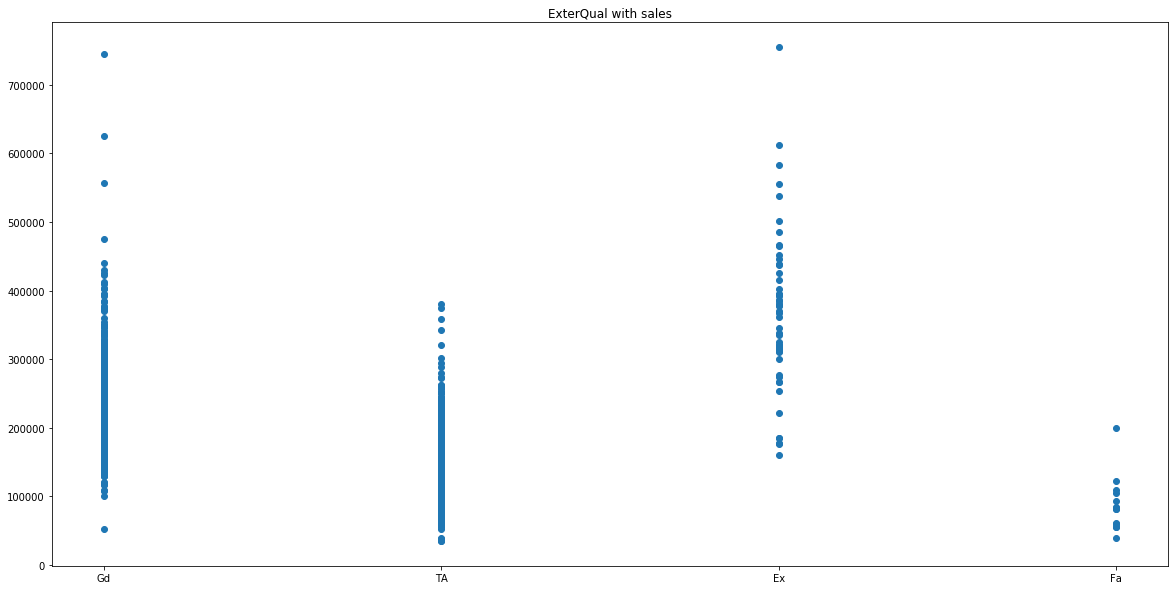

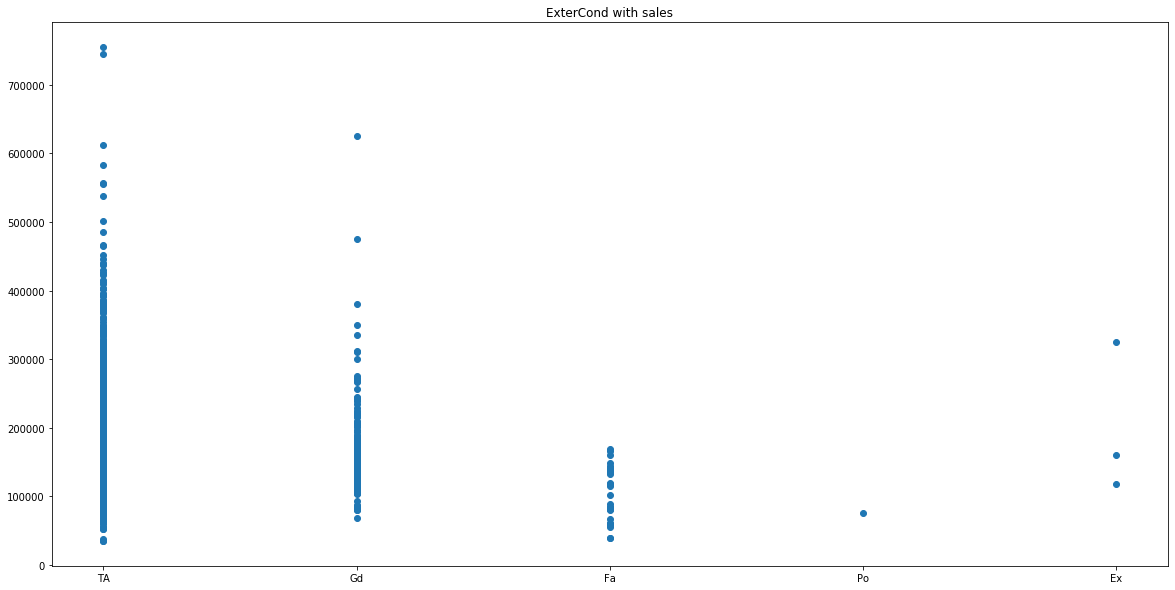

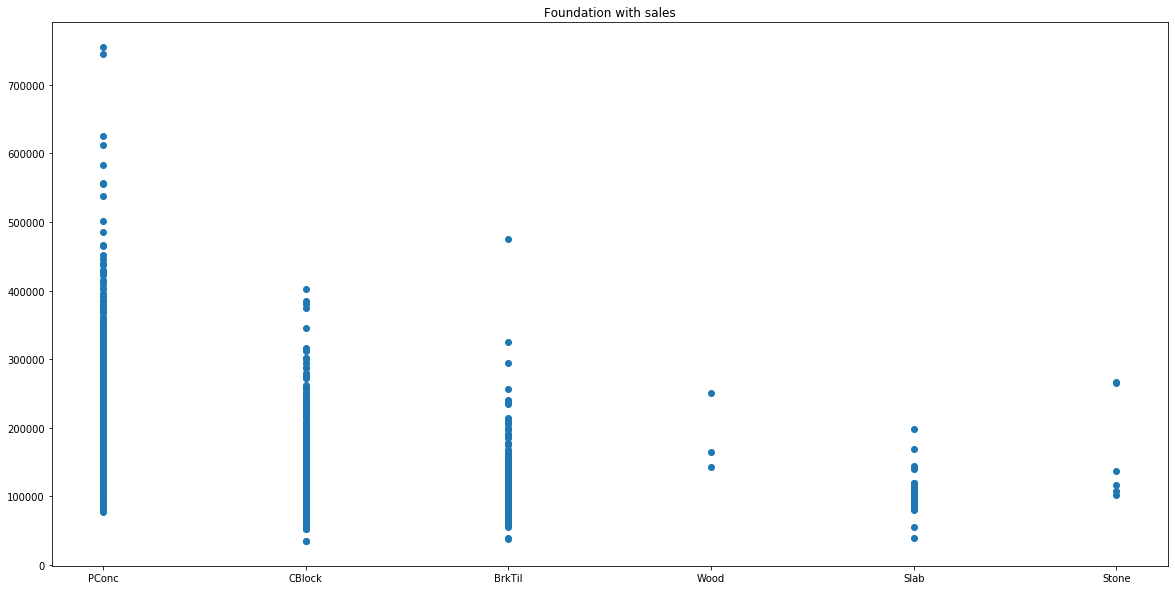

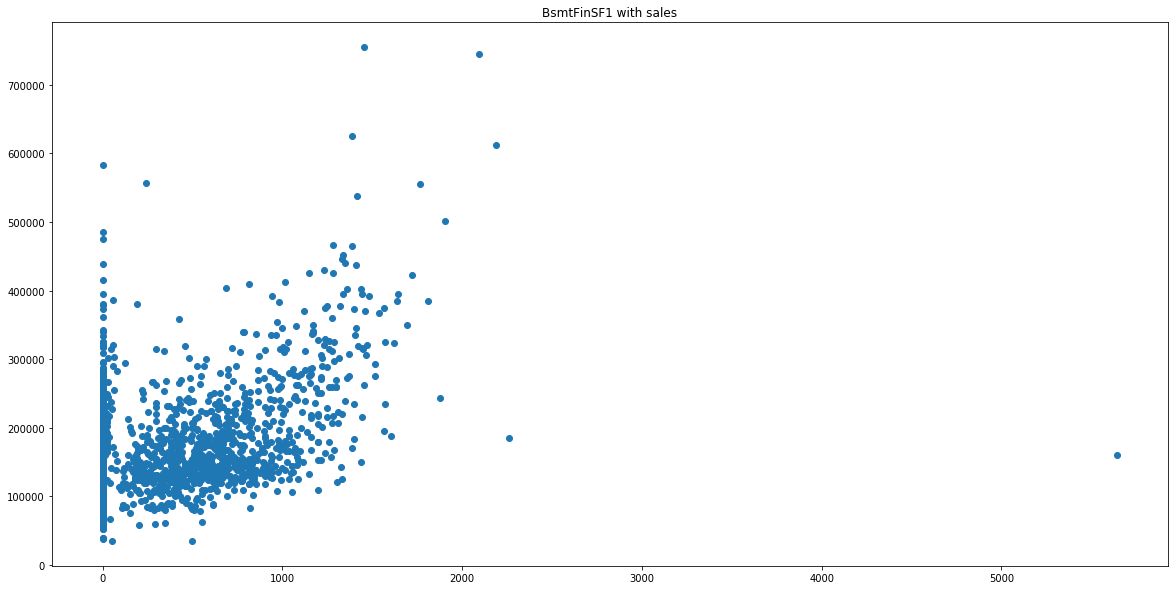

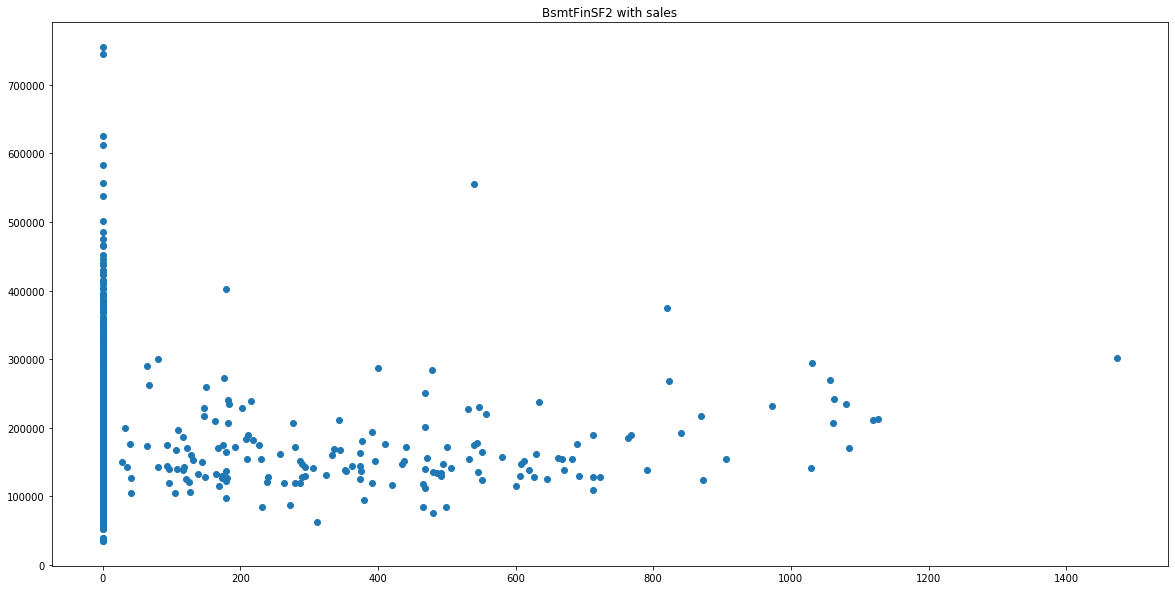

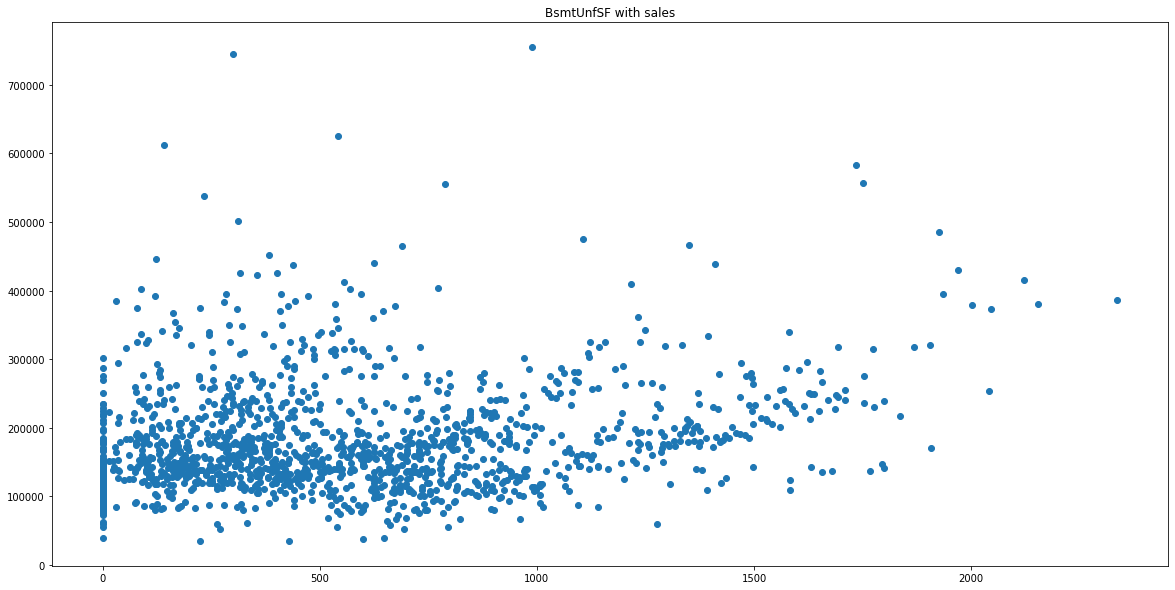

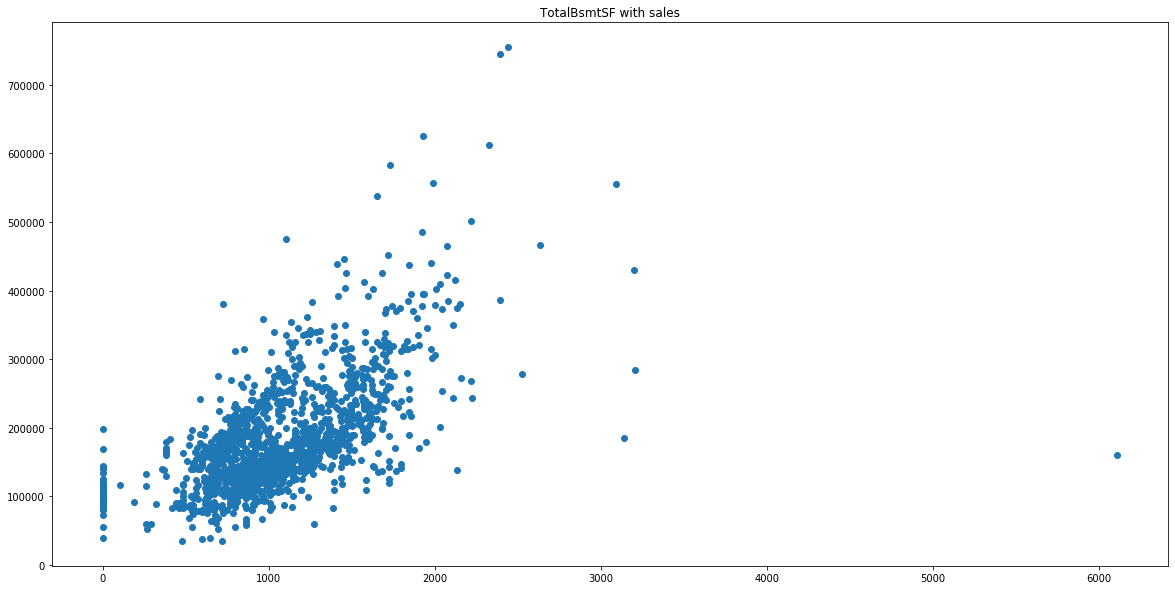

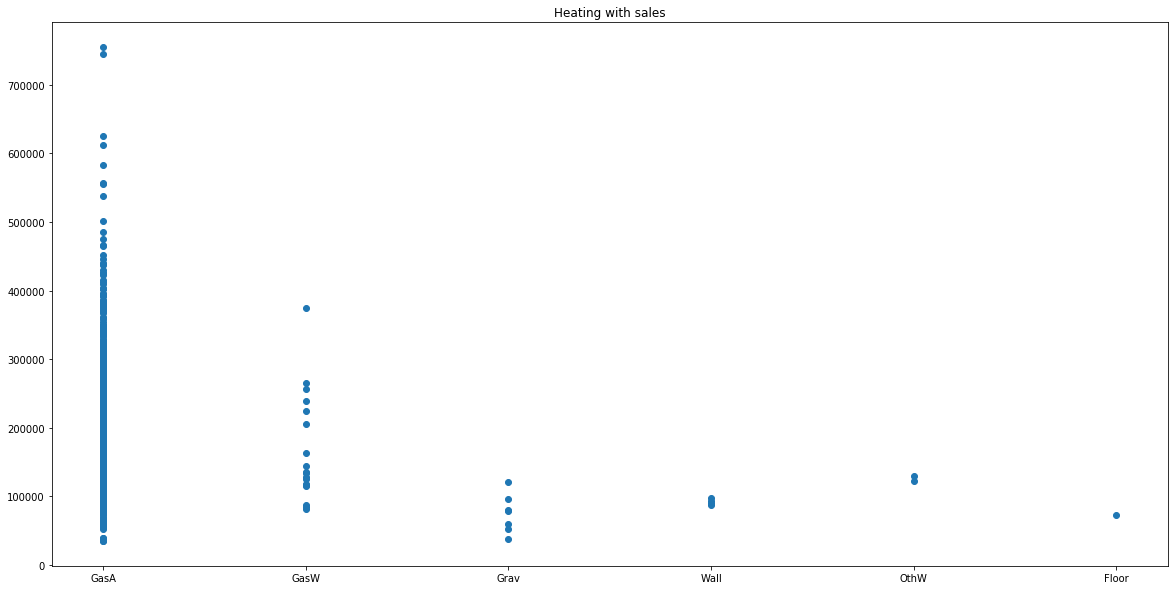

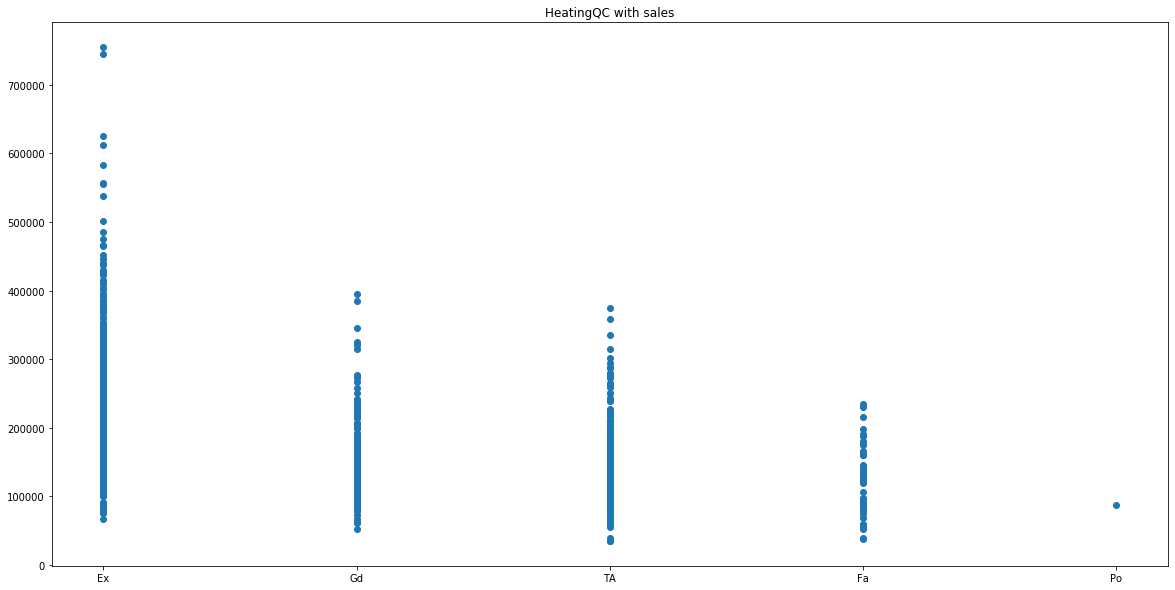

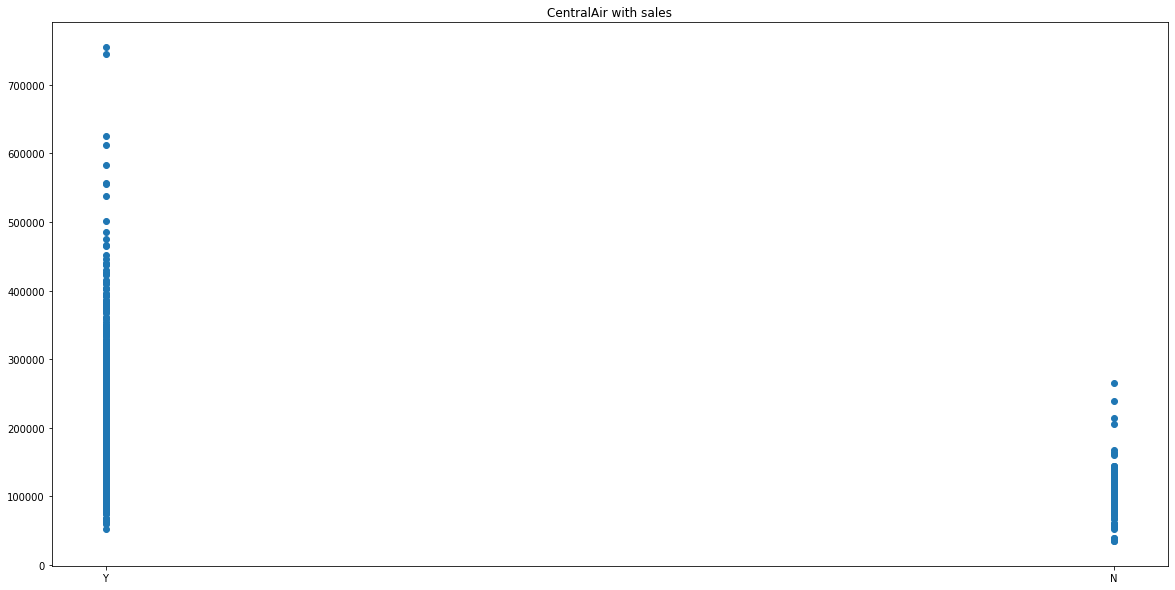

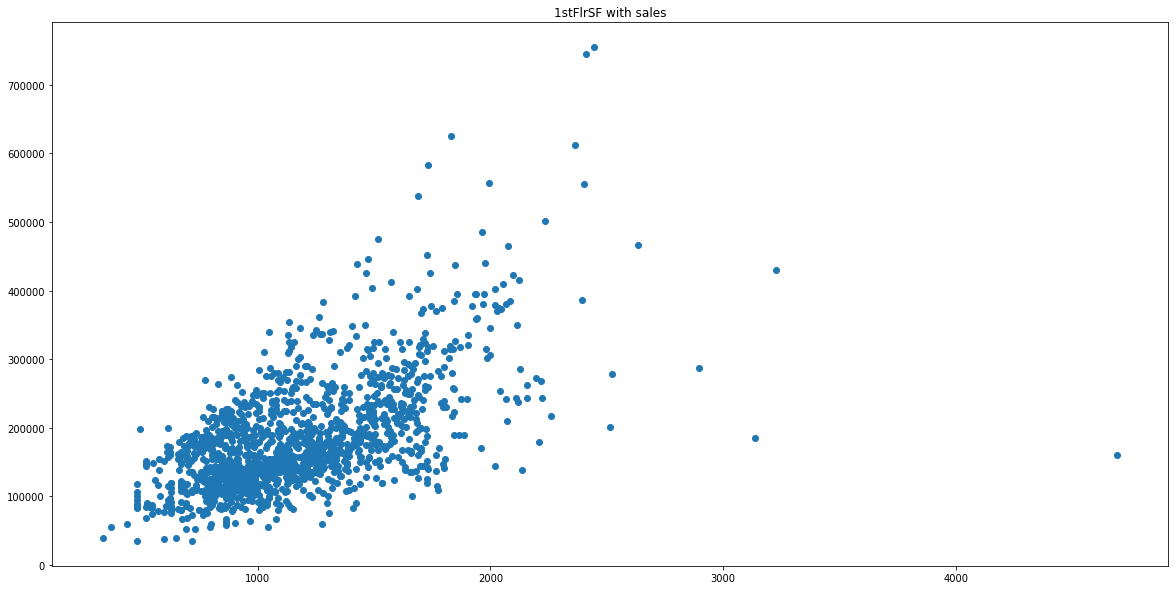

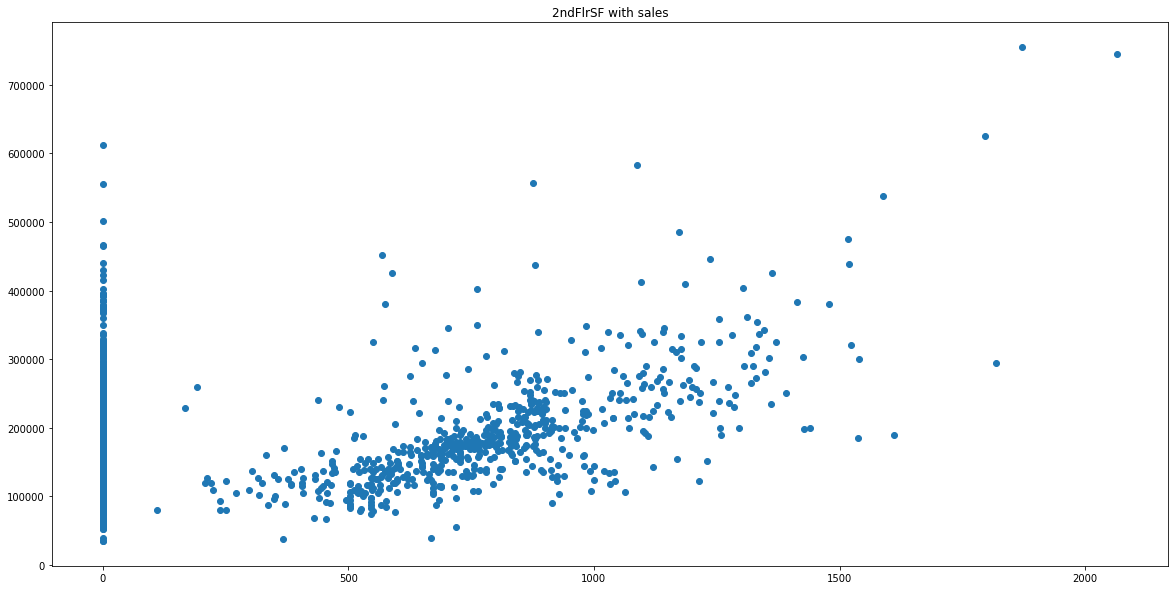

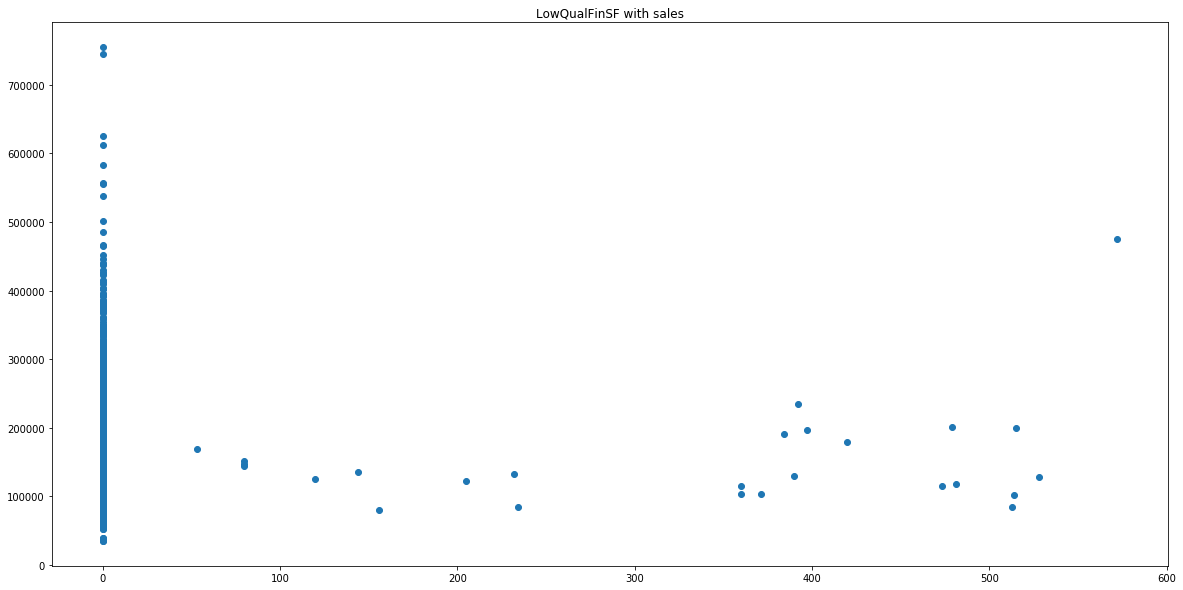

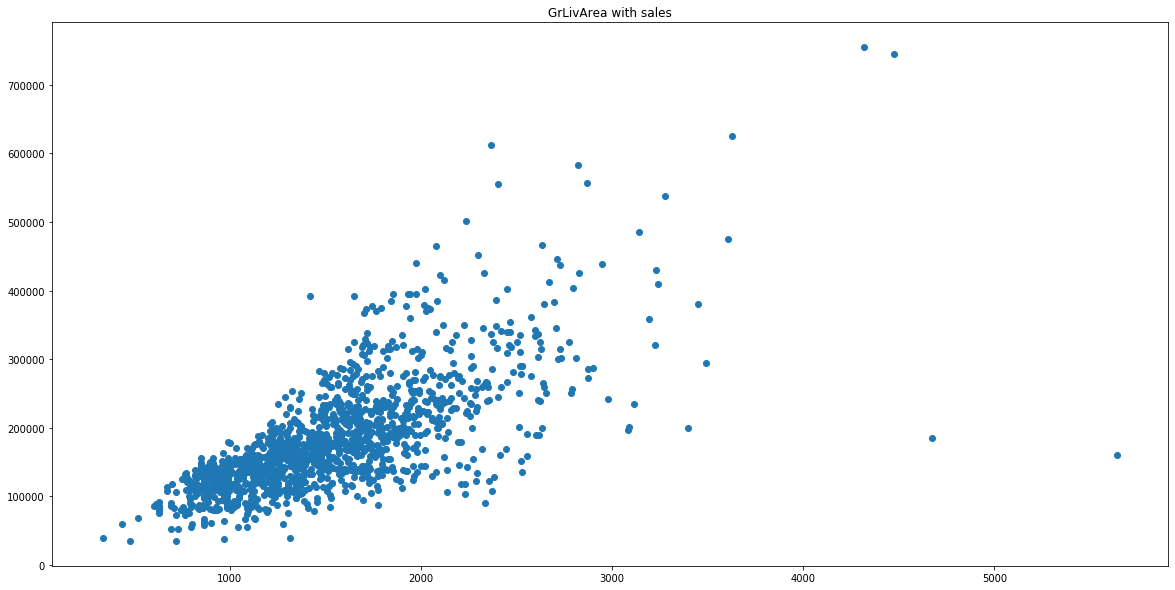

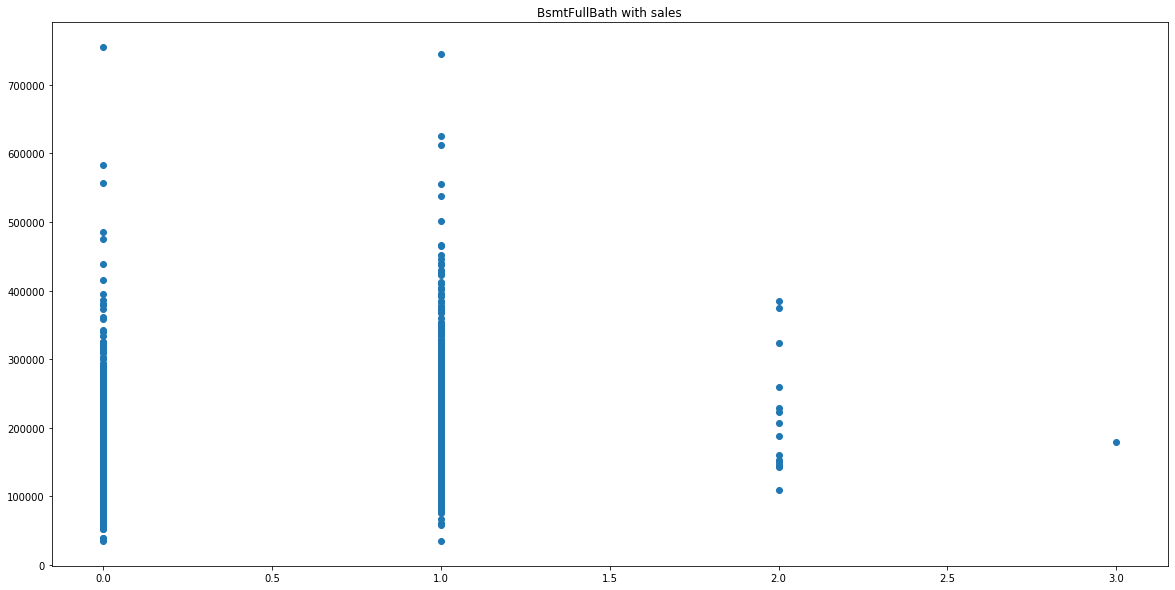

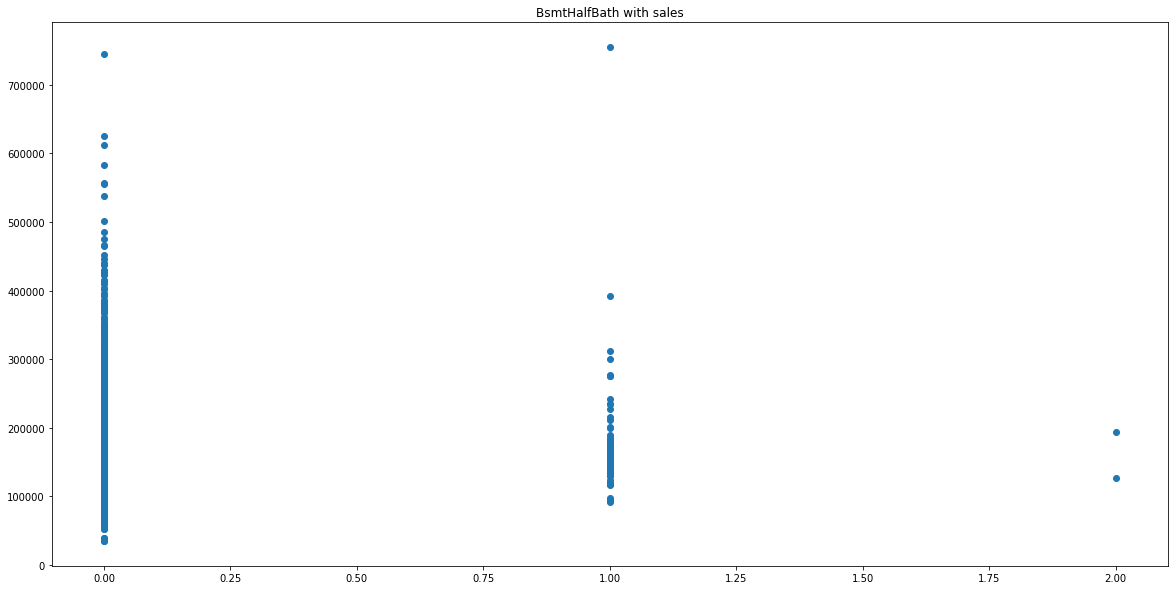

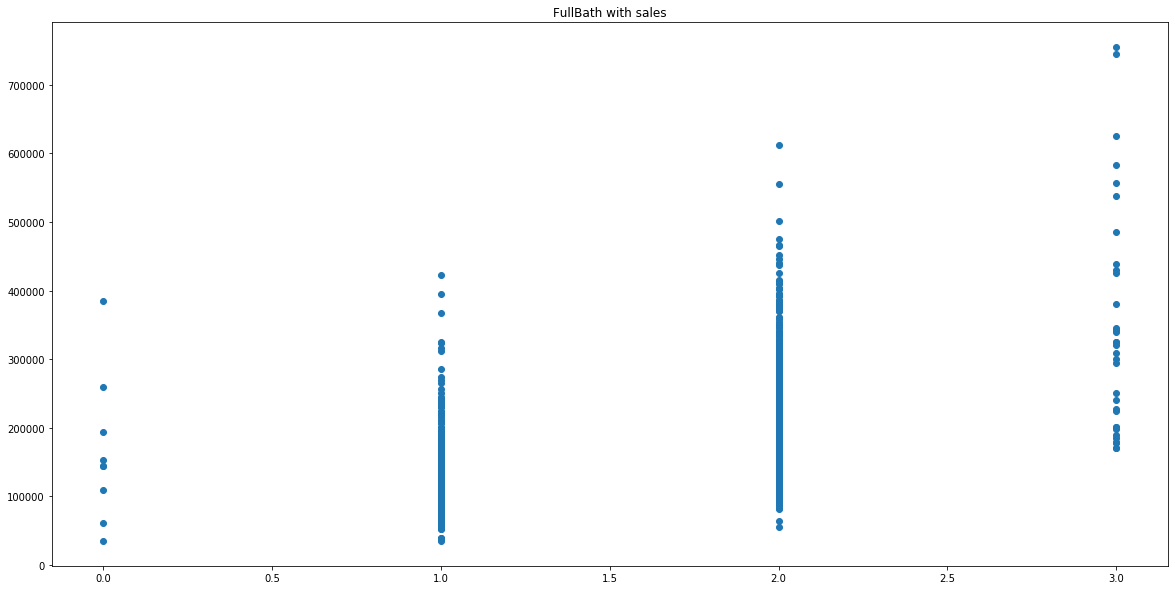

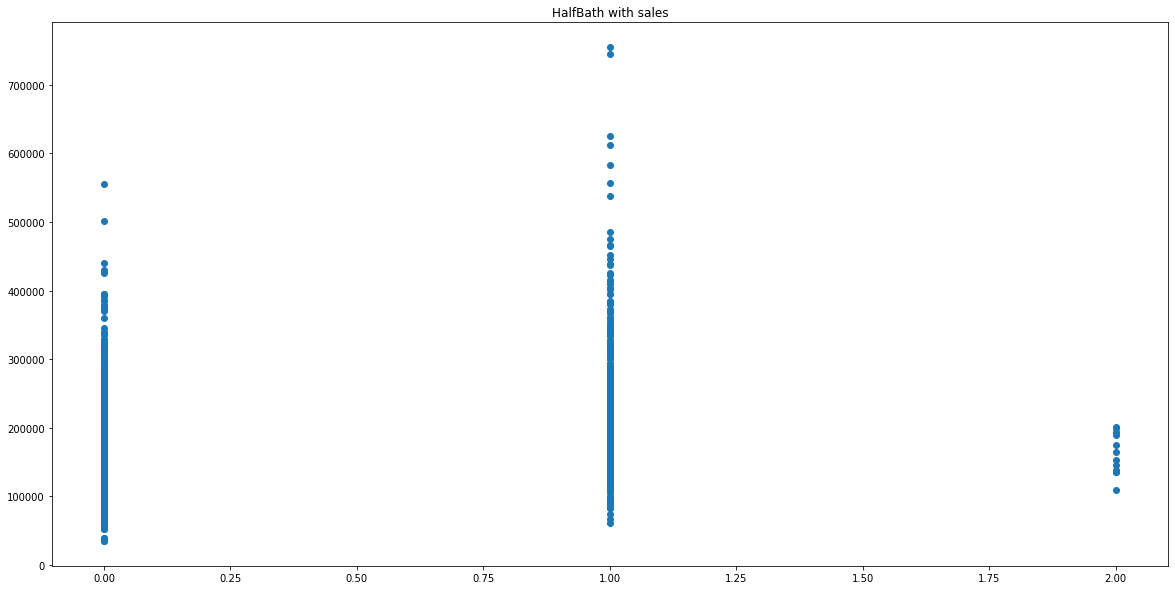

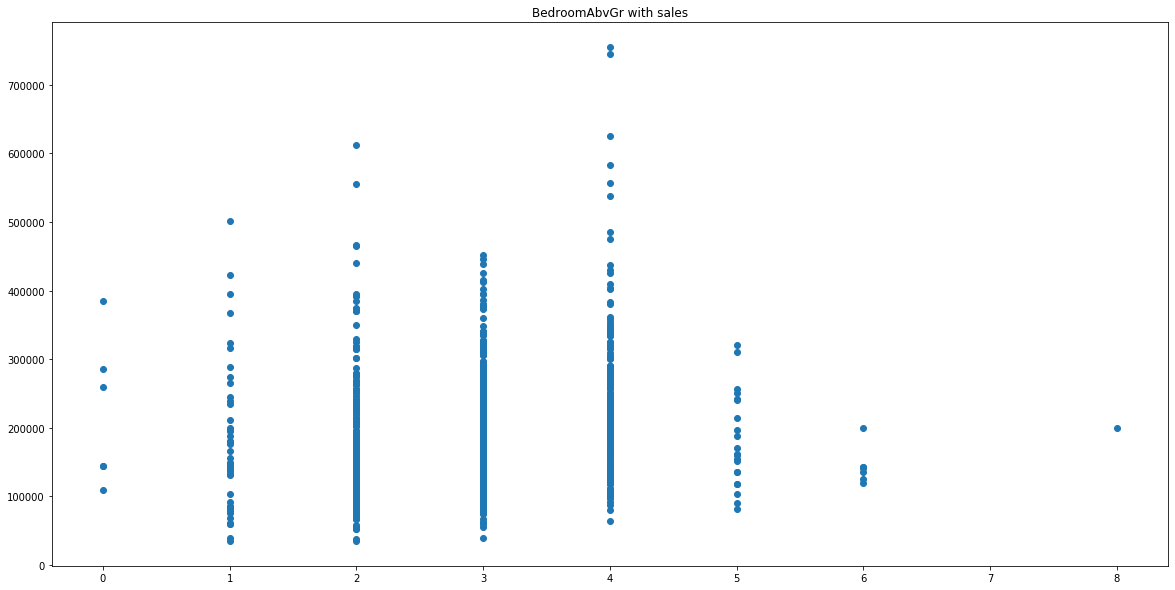

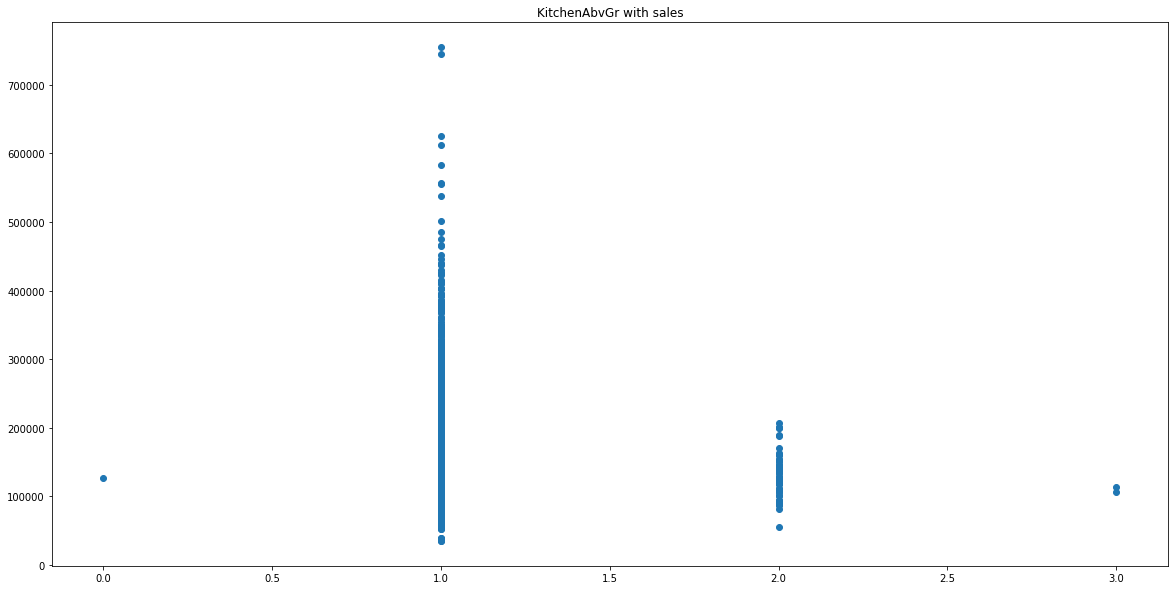

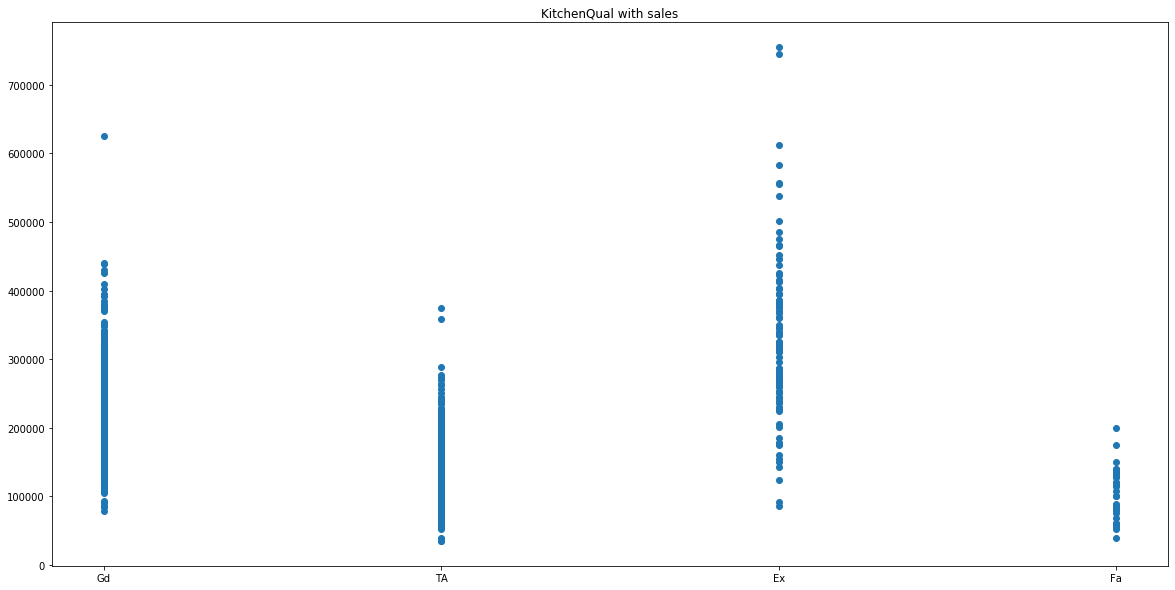

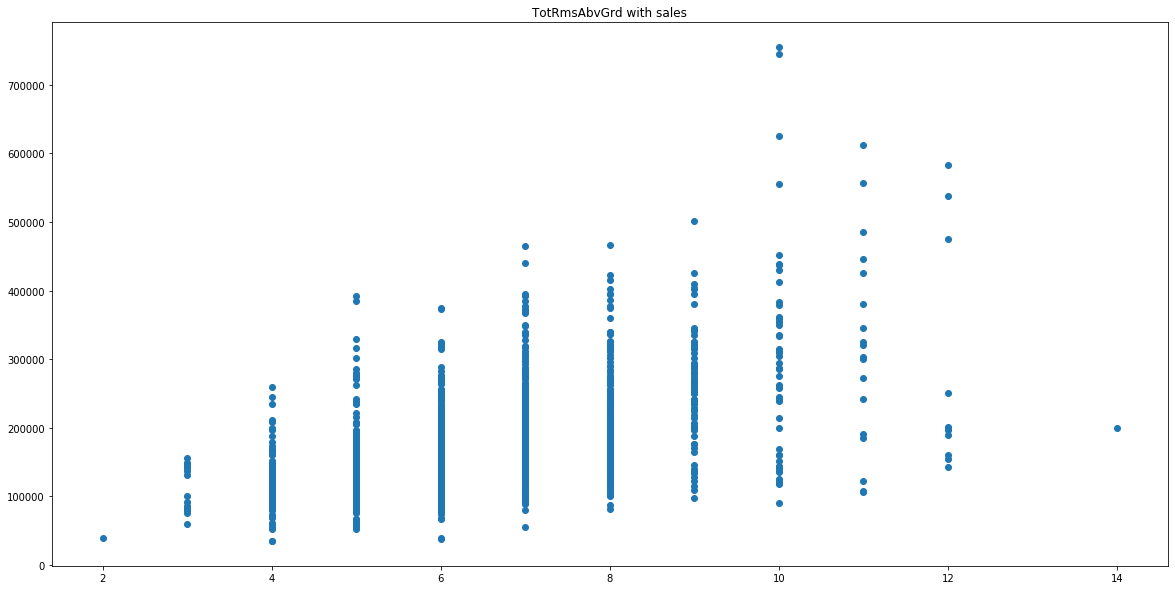

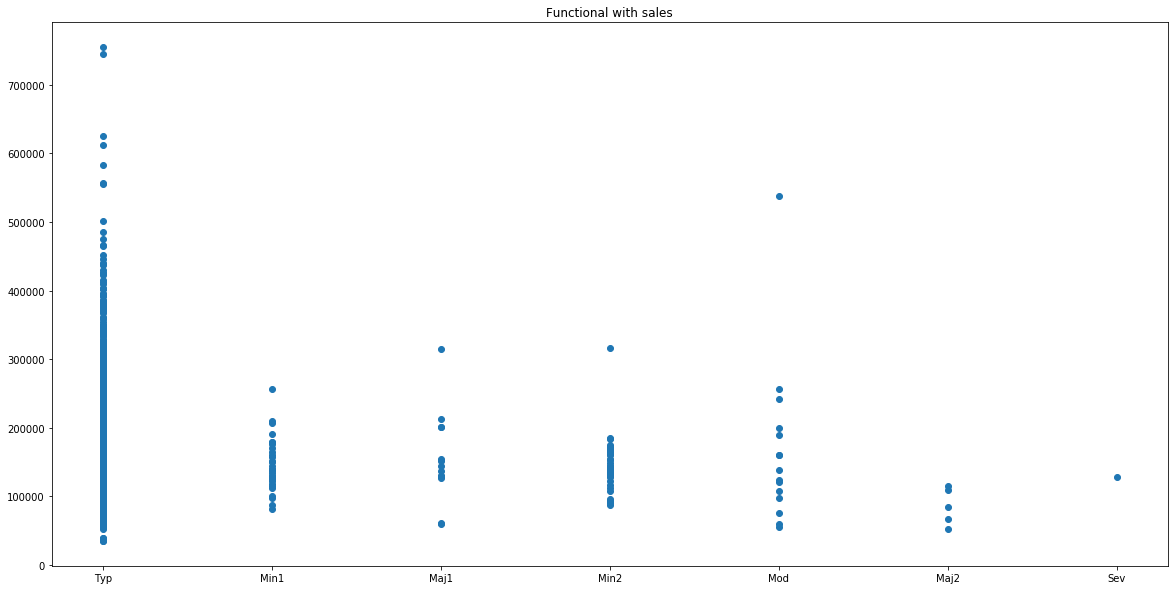

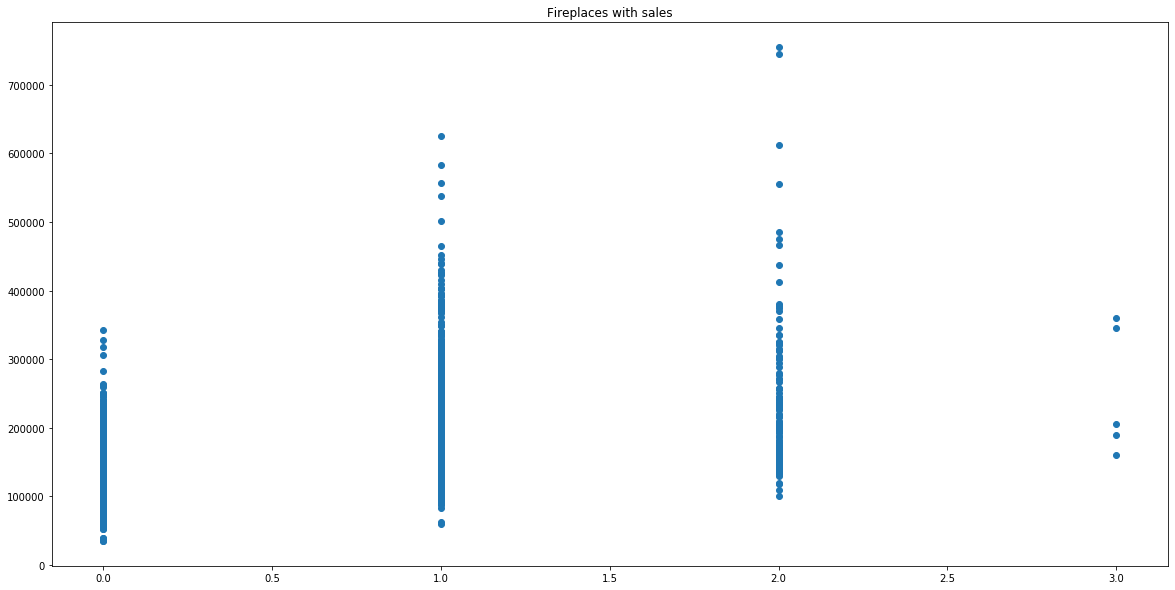

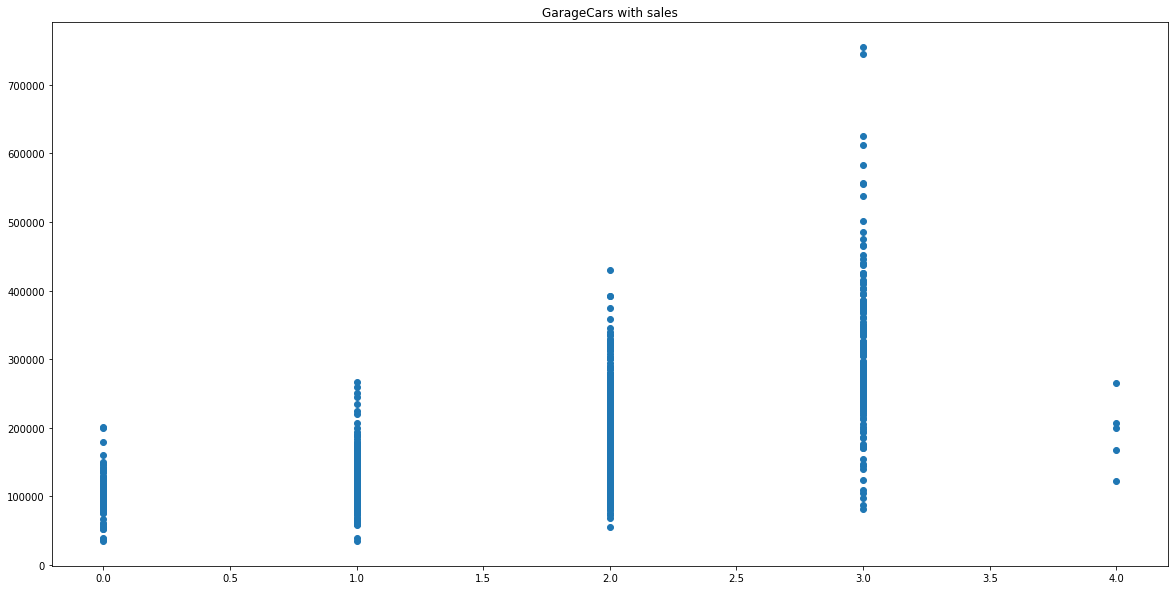

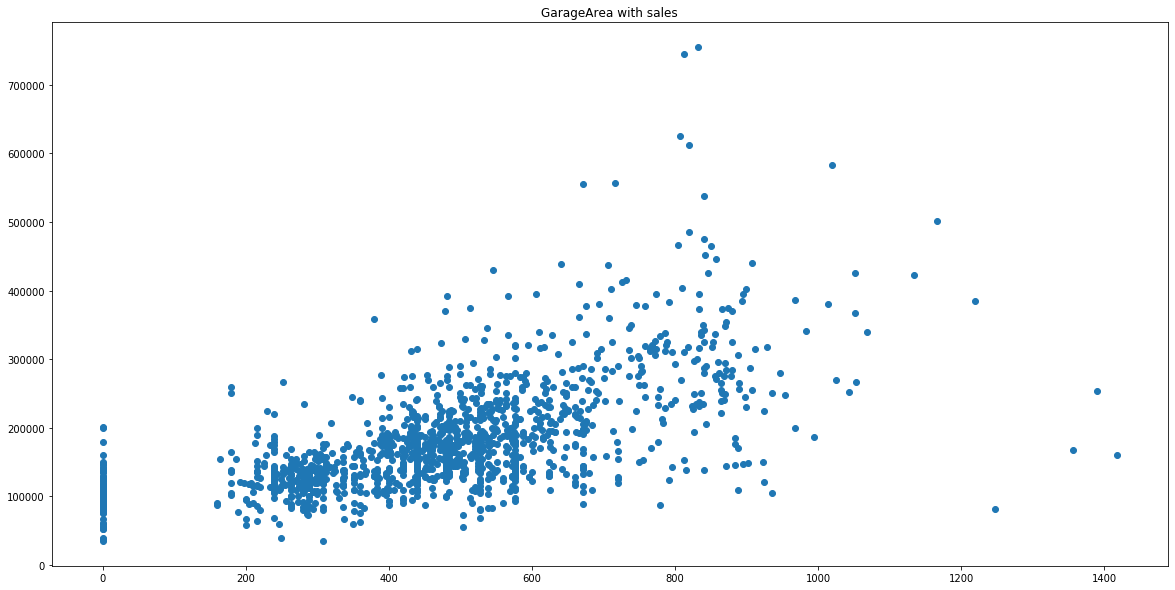

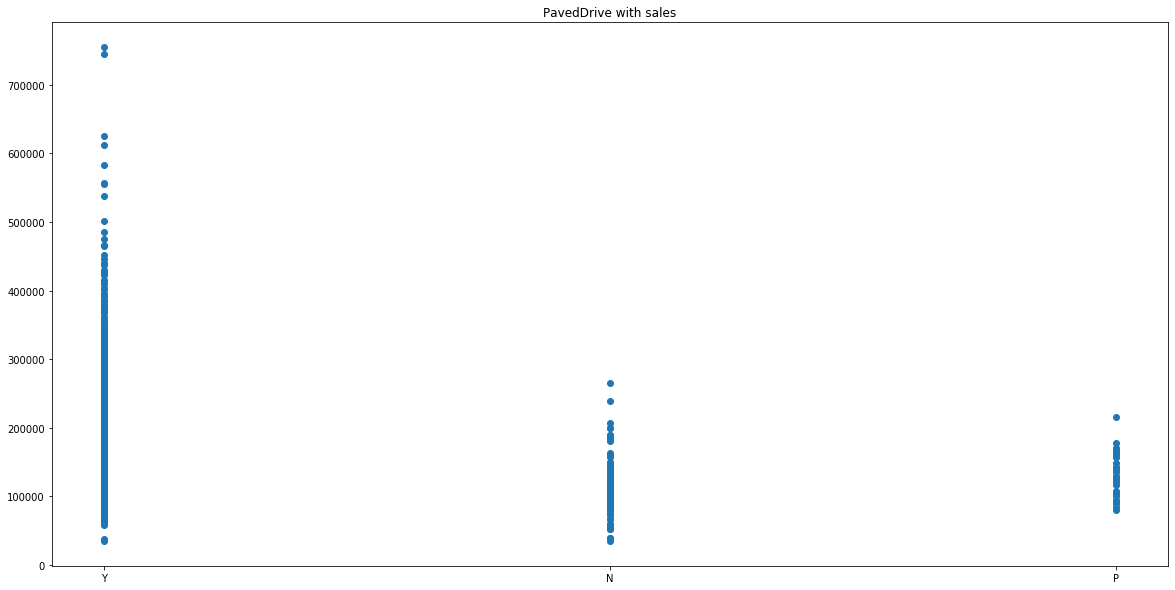

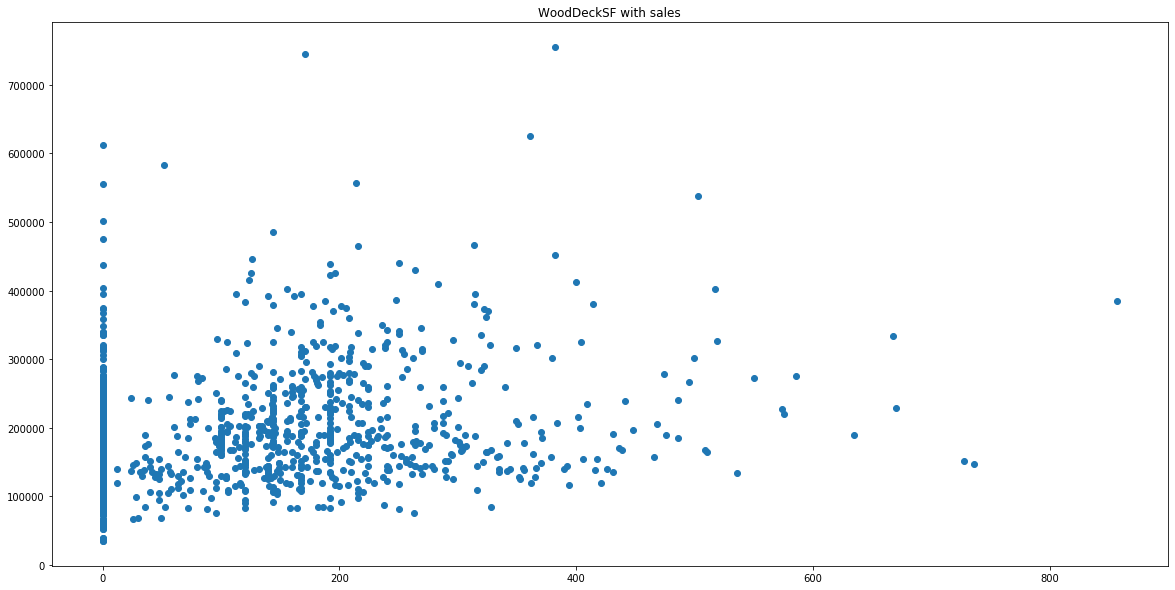

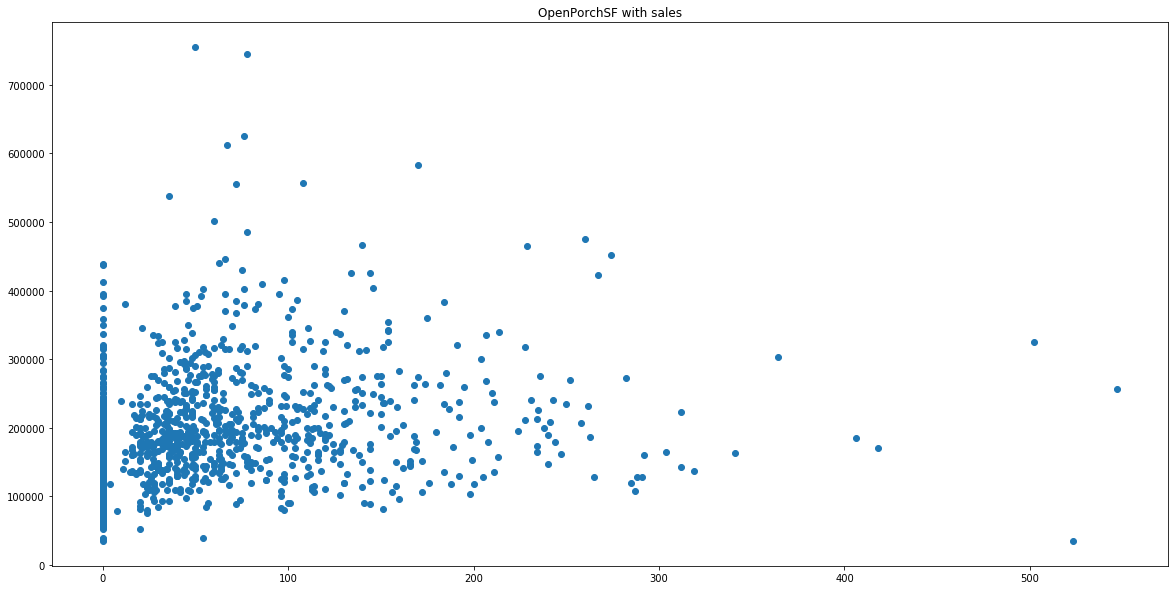

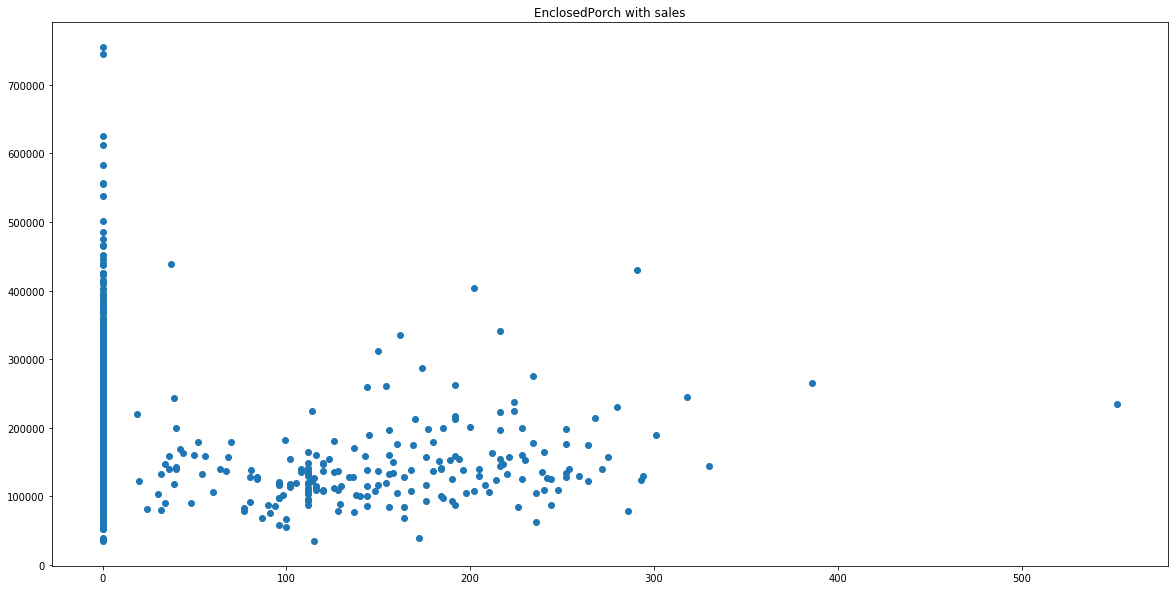

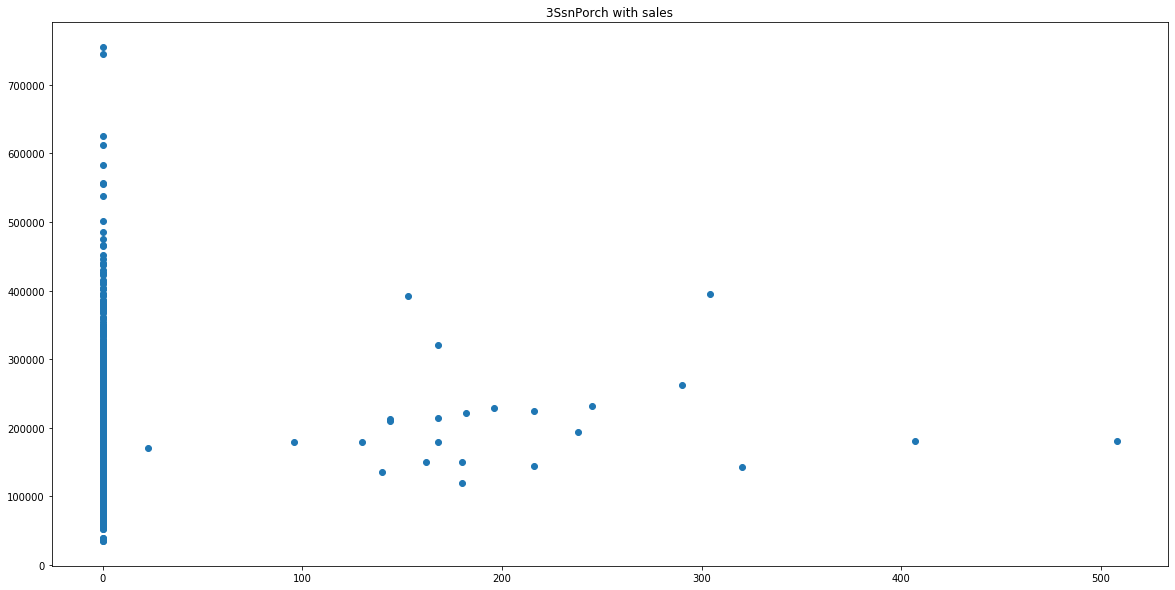

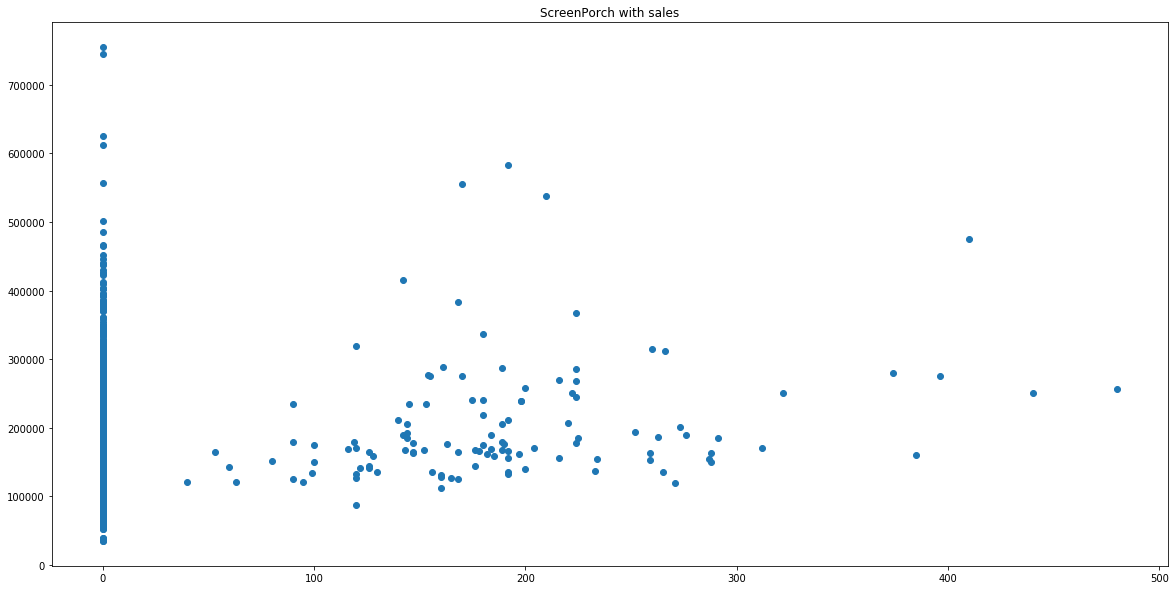

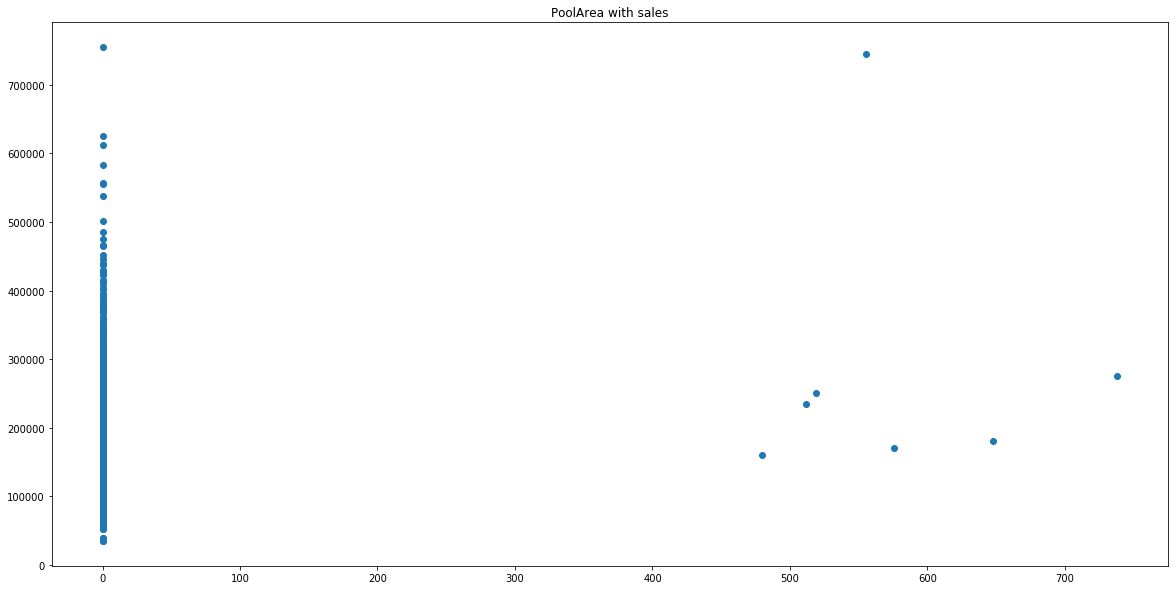

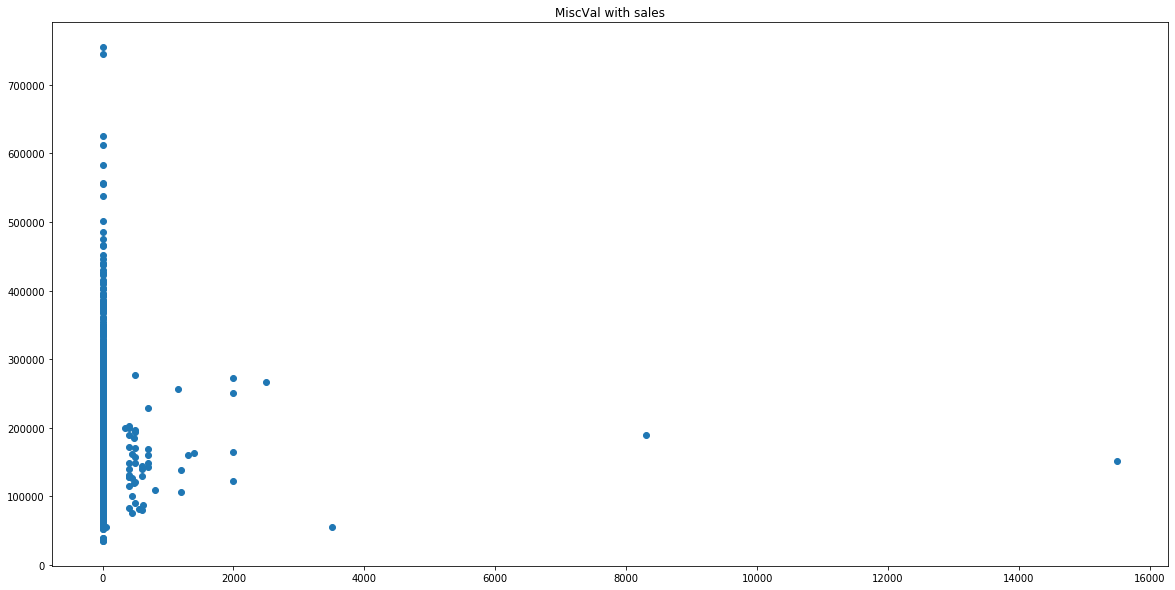

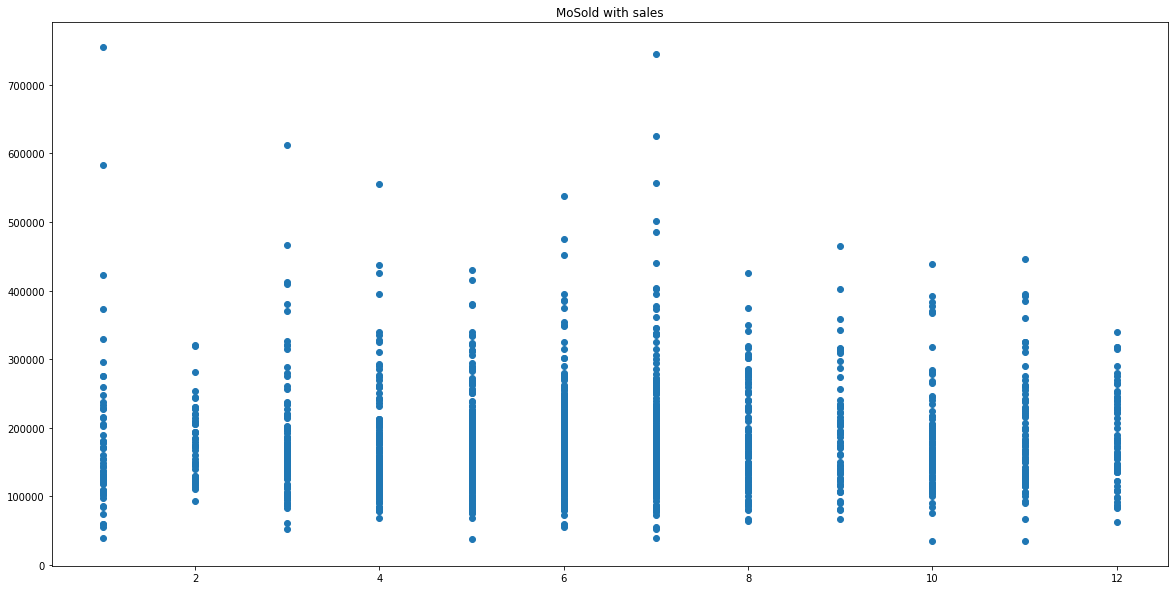

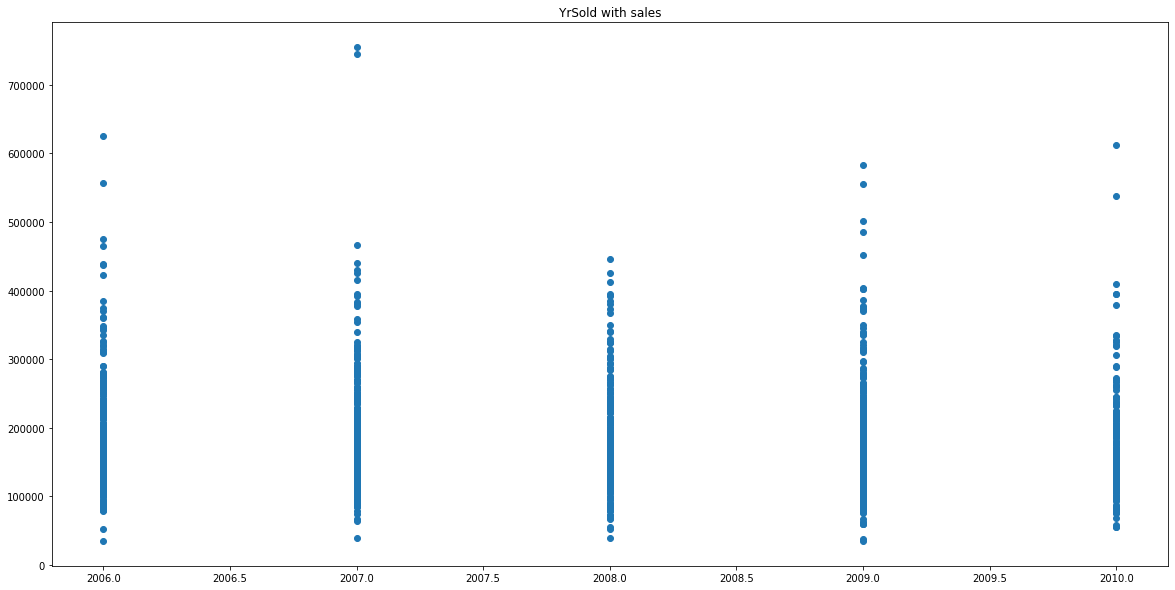

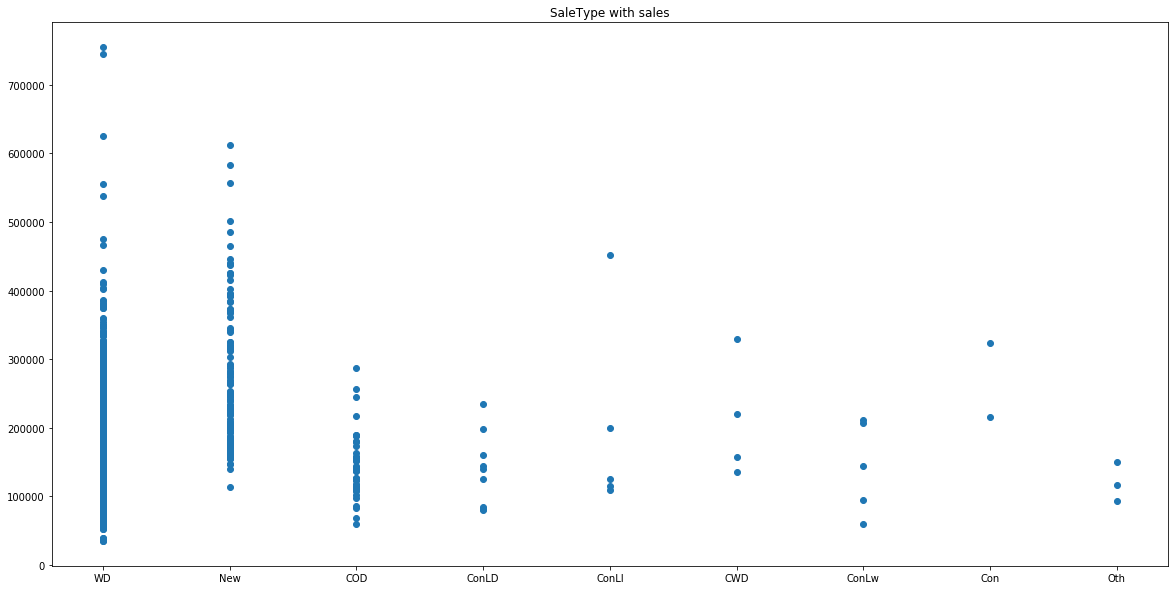

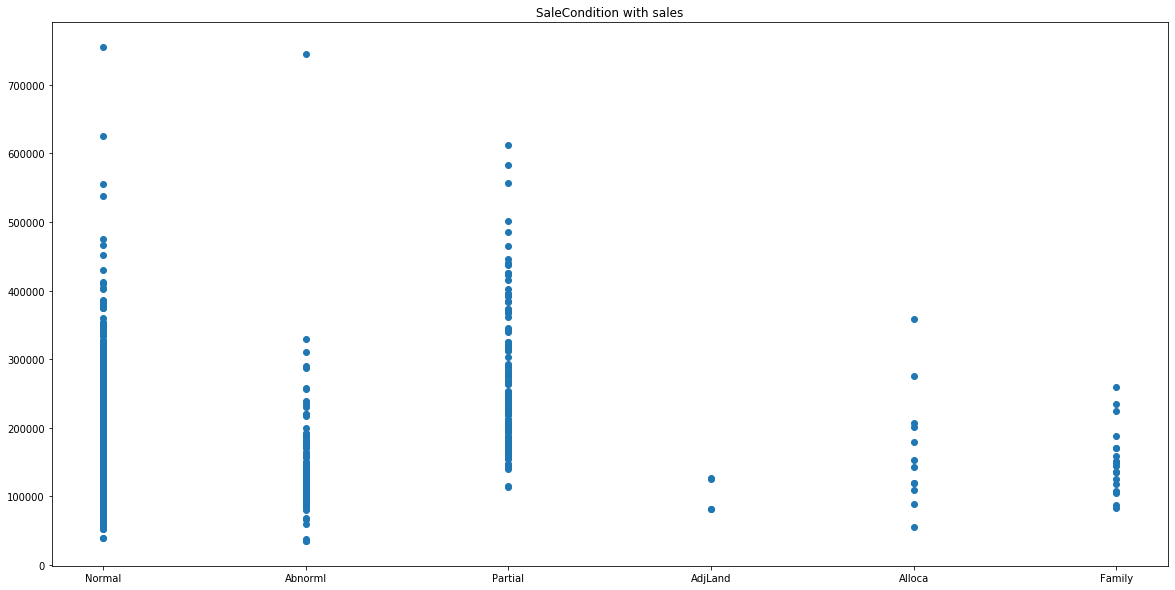

In [37]:
# i know this cell making so critical to think but some of then making precisous sence for the sales price e.g. (OverallQual,1stFirSF, GrLivArea, Full Bath,BsmtUnfSF TotRmsAbvGrd, FirePlaces, Garage cars, Garage Area those attributes are highly positive relation between saleprice) 
for j in lit2:
    c = new_train1[j]
    plt.figure(figsize=(20,10))
    plt.scatter(c, new_train1.SalePrice)
    plt.title(f'{j} with sales') #using f string 
    plt.show()

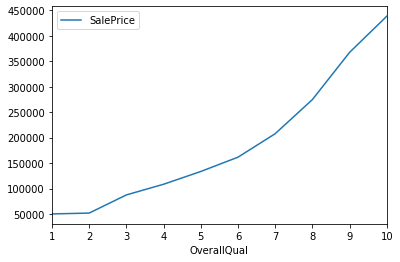

In [38]:
# positively making relation between sale price
pd.pivot_table(new_train1, index='OverallQual', values='SalePrice',aggfunc='mean').plot()

In [39]:
new_train1.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

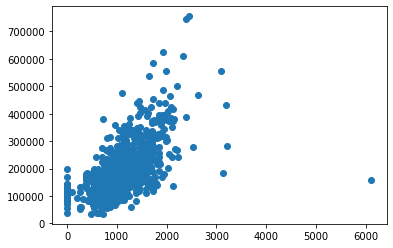

In [40]:
plt.scatter(new_train1.TotalBsmtSF, new_train1.SalePrice)

In [41]:
test_data = pd.read_csv('test.csv')

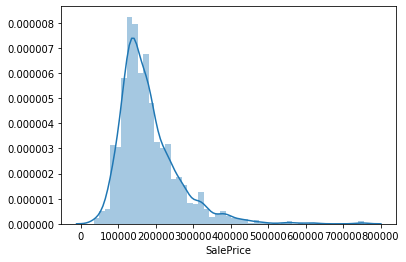

In [42]:
sns.distplot(train_data['SalePrice'])

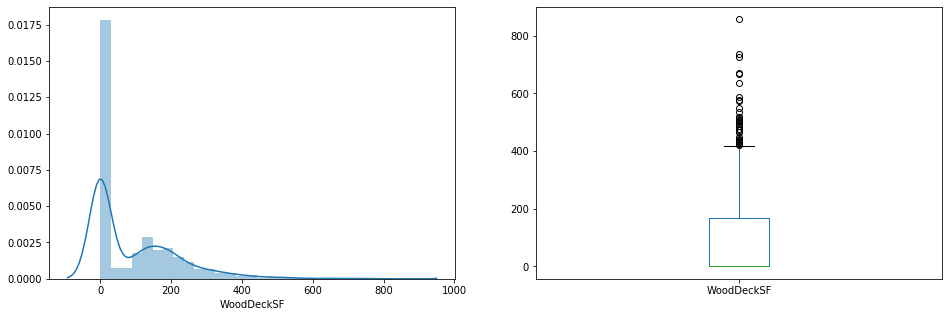

In [43]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train_data['WoodDeckSF'])
plt.subplot(122)
train_data['WoodDeckSF'].plot.box(figsize=(16, 5))

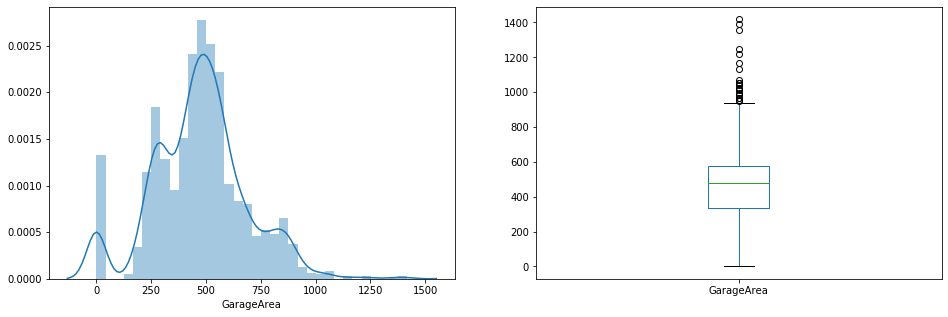

In [44]:
plt.subplot(121)
sns.distplot(train_data['GarageArea'])

plt.subplot(122)
train_data['GarageArea'].plot.box(figsize=(16, 5))

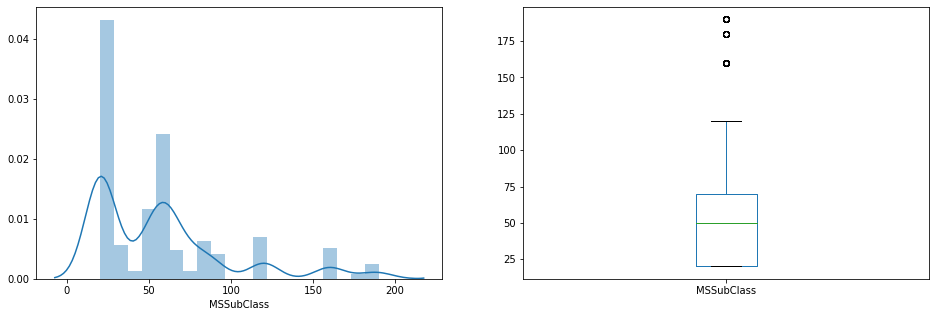

In [45]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train_data['MSSubClass'])
plt.subplot(122)
train_data['MSSubClass'].plot.box(figsize=(16, 5))

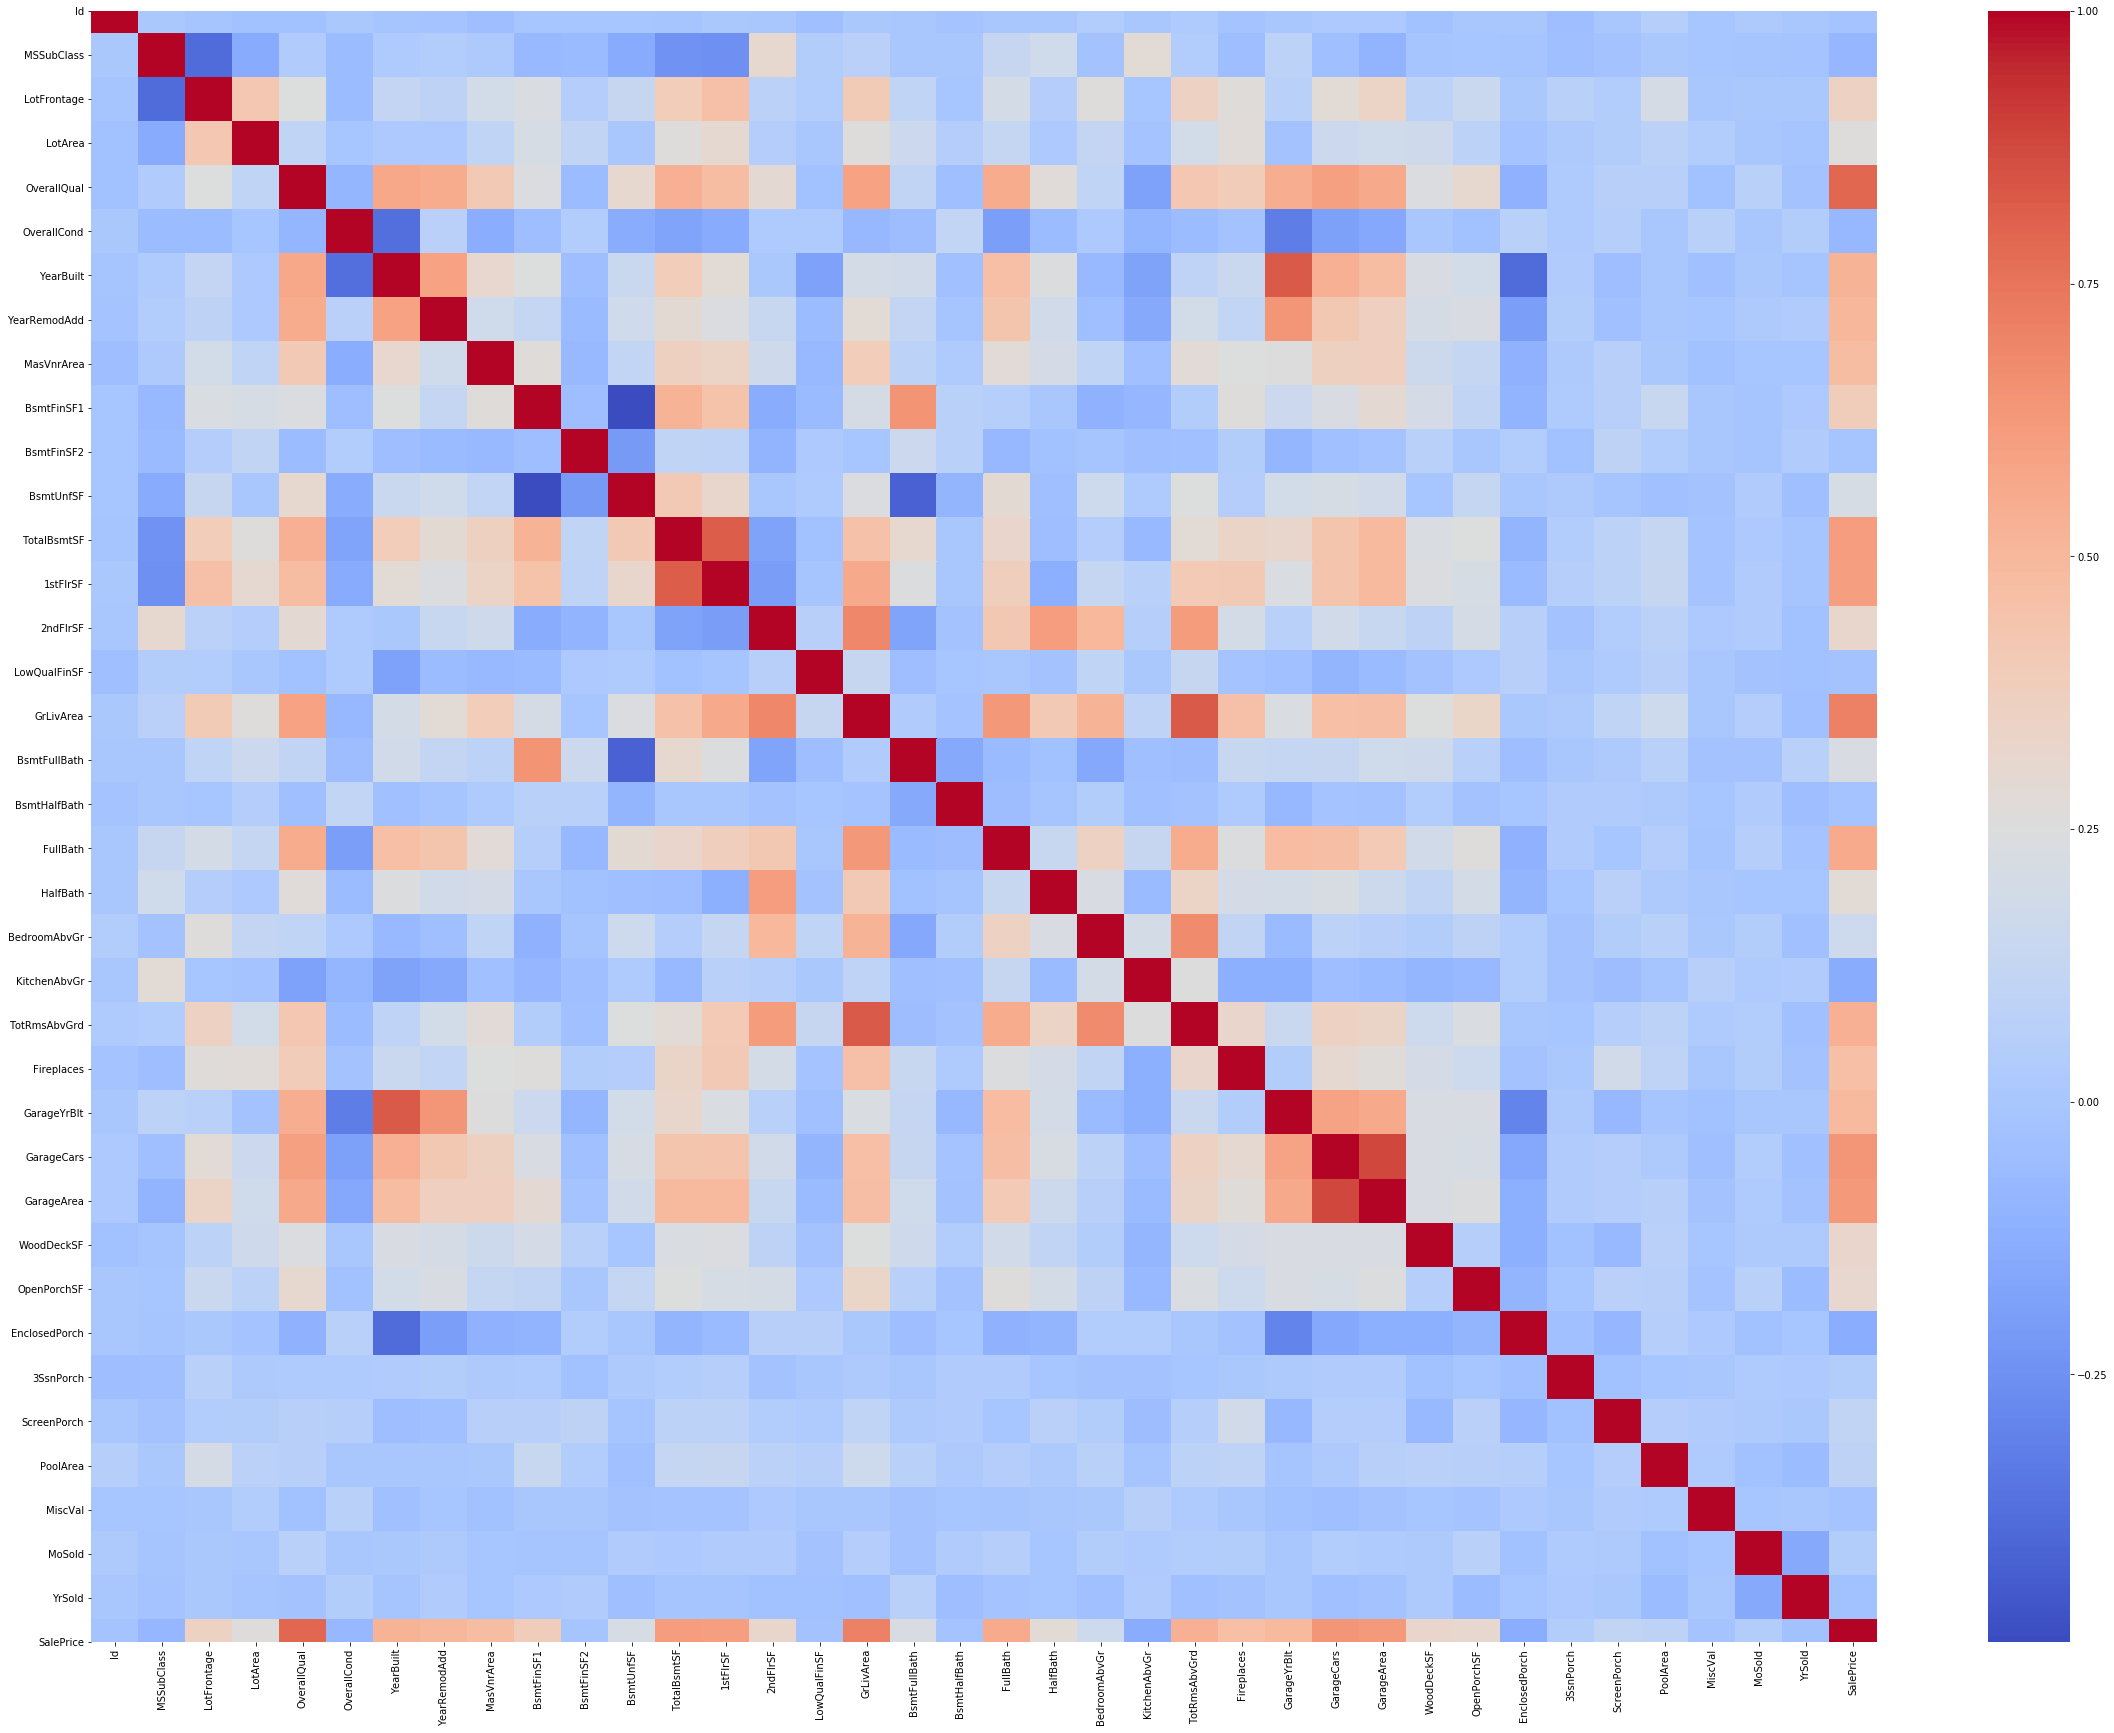

In [46]:
# we can't see the columns name properly so we save this jpg file in our same directory so we can see by zoom it
ax = plt.subplots(figsize=(40,30))
matrix = train_data.corr()
sns.heatmap(matrix, cmap='coolwarm')
plt.savefig('corr_jpg.jpg', bbox_inches ='tight', pad_inches = 0.5)
plt.show()

## preprocessing data

for qulitative data filling null values

for train data

In [47]:
train_data['BsmtCond'] = train_data['BsmtCond'].fillna(train_data.BsmtCond.mode()[0])
train_data['MasVnrType'] = train_data['MasVnrType'].fillna(train_data.MasVnrType.mode()[0])
train_data['BsmtQual'] = train_data['BsmtQual'].fillna(train_data.BsmtQual.mode()[0])
train_data['BsmtExposure'] = train_data['BsmtExposure'].fillna(train_data.BsmtExposure.mode()[0])
train_data['BsmtFinType1'] = train_data['BsmtFinSF1'].fillna(train_data.BsmtFinSF1.mode()[0])
train_data['BsmtFinType2'] = train_data['BsmtFinSF2'].fillna(train_data.BsmtFinSF2.mode()[0])
train_data['Electrical'] = train_data['Electrical'].fillna(train_data.Electrical.mode()[0])
train_data['FireplaceQu'] = train_data['FireplaceQu'].fillna(train_data.FireplaceQu.mode()[0])
train_data['GarageType'] = train_data['GarageType'].fillna(train_data.GarageType.mode()[0])
train_data['GarageFinish'] = train_data['GarageFinish'].fillna(train_data.GarageFinish.mode()[0])
train_data['GarageQual'] = train_data['GarageQual'].fillna(train_data.GarageQual.mode()[0])
train_data['GarageCond'] = train_data['GarageCond'].fillna(train_data.GarageCond.mode()[0])

In [48]:
train_data['LotFrontage'].fillna(train_data.LotFrontage.mean(), inplace = True)
train_data['MasVnrArea'].fillna(train_data.MasVnrArea.mean(),inplace=True)

In [49]:
test_data['LotFrontage'].fillna(test_data.LotFrontage.mean(), inplace=True)
test_data['MasVnrArea'].fillna(test_data.MasVnrArea.mean(), inplace=True)
test_data['BsmtFinSF2'].fillna(test_data.BsmtFinSF2.mean(), inplace=True)

In [50]:
test_data['BsmtFinSF1'].fillna(test_data.BsmtFinSF1.mean(), inplace=True)
test_data['BsmtUnfSF'].fillna(test_data.BsmtUnfSF.mean(), inplace=True)
test_data['TotalBsmtSF'].fillna(test_data.TotalBsmtSF.mean(), inplace=True)
test_data['GarageArea'].fillna(test_data.GarageArea.mean(), inplace=True)

for test data

In [51]:
# part  1
test_data['BsmtCond'] = test_data['BsmtCond'].fillna(test_data.BsmtCond.mode()[0])
test_data['MasVnrType'] = test_data['MasVnrType'].fillna(test_data.MasVnrType.mode()[0])
test_data['BsmtQual'] = test_data['BsmtQual'].fillna(test_data.BsmtQual.mode()[0])
test_data['BsmtExposure'] = test_data['BsmtExposure'].fillna(test_data.BsmtExposure.mode()[0])
test_data['BsmtFinType1'] = test_data['BsmtFinSF1'].fillna(test_data.BsmtFinSF1.mode()[0])
test_data['BsmtFinType2'] = test_data['BsmtFinSF2'].fillna(test_data.BsmtFinSF2.mode()[0])
test_data['Electrical'] = test_data['Electrical'].fillna(test_data.Electrical.mode()[0])
test_data['FireplaceQu'] = test_data['FireplaceQu'].fillna(test_data.FireplaceQu.mode()[0])
test_data['GarageType'] = test_data['GarageType'].fillna(test_data.GarageType.mode()[0])
test_data['GarageFinish'] = test_data['GarageFinish'].fillna(test_data.GarageFinish.mode()[0])
test_data['GarageQual'] = test_data['GarageQual'].fillna(test_data.GarageQual.mode()[0])
test_data['GarageCond'] = test_data['GarageCond'].fillna(test_data.GarageCond.mode()[0])

In [52]:
# part  2
test_data['MSZoning'] = test_data['MSZoning'].fillna(test_data.MSZoning.mode()[0])
test_data['Utilities'] = test_data['Utilities'].fillna(test_data.Utilities.mode()[0])
test_data['Exterior1st'] = test_data['Exterior1st'].fillna(test_data.Exterior1st.mode()[0])
test_data['Exterior2nd'] = test_data['Exterior2nd'].fillna(test_data.Exterior2nd.mode()[0])
test_data['SaleType'] = test_data['SaleType'].fillna(test_data.SaleType.mode()[0])
test_data['KitchenQual'] = test_data['KitchenQual'].fillna(test_data.KitchenQual.mode()[0])
test_data['Functional'] = test_data['Functional'].fillna(test_data.Functional.mode()[0])

In [53]:
test_data['BsmtFullBath'] = test_data['BsmtFullBath'].fillna(test_data.BsmtFullBath.mode()[0])
test_data['BsmtHalfBath'] = test_data['BsmtHalfBath'].fillna(test_data.BsmtHalfBath.mode()[0])
test_data['GarageCars'] = test_data['GarageCars'].fillna(test_data.GarageCars.mode()[0])

quantitative data

drop variable which are not neccessary

In [54]:
train_data.drop('Alley', axis=1, inplace=True)
train_data.drop('PoolQC', axis=1, inplace=True)
train_data.drop('Fence', axis=1, inplace=True)
train_data.drop('MiscFeature', axis=1, inplace=True)
train_data.drop('GarageYrBlt', axis=1, inplace=True)
train_data.drop('Id', axis=1, inplace = True)
train_data.drop('YrSold', axis=1, inplace=True)

In [55]:
test_data.drop('Alley', axis=1, inplace=True)
test_data.drop('PoolQC', axis=1, inplace=True)
test_data.drop('Fence', axis=1, inplace=True)
test_data.drop('MiscFeature', axis=1, inplace=True)
test_data.drop('GarageYrBlt', axis=1, inplace=True)
test_data.drop('Id', axis=1, inplace = True)
test_data.drop('YrSold', axis=1, inplace=True)

In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
LE = LabelEncoder()

In [58]:
obje_li = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'BsmtFinType1', 'BsmtFinType2', 'SaleCondition']

In [59]:
for k in obje_li:
    train_data[k] = LE.fit_transform(train_data[k])

In [60]:
for k in obje_li:
    test_data[k] = LE.fit_transform(test_data[k])

In [61]:
test_data.isnull().sum().sum()

0

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
ss = StandardScaler()

In [64]:
all_attribute = ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SaleType',
       'SaleCondition']

In [65]:
train_data[all_attribute] = ss.fit_transform(train_data[all_attribute])

In [66]:
test_data[all_attribute] = ss.fit_transform(test_data[all_attribute])

In [67]:
X = train_data.drop('SalePrice', 1)

In [68]:
Y = train_data.SalePrice

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.3, random_state= 42)

In [71]:
tr = [x_train, x_test, y_train, y_test]
for i in tr:
    shpe = i.shape
    print(shpe)

(1022, 73)
(438, 73)
(1022,)
(438,)


In [72]:
from sklearn.metrics import r2_score

In [73]:
from sklearn.linear_model import Ridge

In [74]:
RR = Ridge(alpha=100)

In [75]:
RR.fit(x_train, y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [76]:
Sales_pred_RR1 = RR.predict(x_test)

In [77]:
r2_score(y_test, Sales_pred_RR1)

0.8523386939200877

In [78]:
Sales_pred_RR2 = RR.predict(test_data)

In [79]:
Sales_pred_RR2

array([118518.78904867, 141855.9903253 , 181107.35829164, ...,
       154993.1843647 , 112427.67662444, 258024.3142705 ])

In [80]:
from sklearn.linear_model import Lasso

In [81]:
LS = Lasso()

In [82]:
LS.fit(x_train, y_train)

C:\Users\bala prajapati\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9648391608.00879, tolerance: 615098412.8205527
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [83]:
Sales_pred_LS1 = LS.predict(x_test)

In [84]:
r2_score(y_test, Sales_pred_LS1)

0.8448276018362376

In [85]:
Sales_pred_LS2 = LS.predict(test_data)

In [86]:
Sales_pred_LS2

array([122659.50949405, 142641.27390061, 184447.53099582, ...,
       153597.24760342, 114899.50896462, 254722.74226725])

In [87]:
from sklearn.tree import DecisionTreeRegressor

In [88]:
DT = DecisionTreeRegressor()

In [89]:
DT.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [90]:
Sales_pred_DT1 = DT.predict(x_test)

In [91]:
r2_score(y_test, Sales_pred_DT1)

0.7202186309765507

In [92]:
Sales_pred_DT2 = DT.predict(test_data)

In [93]:
Sales_pred_DT2

array([129900., 160000., 240000., ..., 150000., 100000., 197000.])

In [94]:
117500/169277

0.6941285585165143

In [95]:
from sklearn.ensemble import RandomForestRegressor

In [96]:
RF = RandomForestRegressor(n_estimators=100)

In [97]:
RF.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [98]:
Sales_pred_RF1 = RF.predict(x_test)

In [99]:
r2_score(y_test, Sales_pred_RF1)

0.8951866816402222

In [100]:
Sales_pred_RF2 = RF.predict(test_data)

In [101]:
Sales_pred_RF2

array([129441.  , 155307.32, 186230.37, ..., 161095.6 , 116746.  ,
       237907.75])

In [102]:
130651/169277

0.7718177897765202

In [103]:
pred = pd.read_csv('sample_submission.csv')

In [104]:
submission2 = pred.copy()

In [105]:
submission2

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [106]:
test_data2 = pd.read_csv('test.csv')

In [1]:
# submission2['SalePrice'] = Sales_pred_RF2
# submission2['Id'] = test_data2['Id']

# pd.DataFrame(submission2, columns=['Id', 'SalePrice']).to_csv('Submission.csv')